## Imports

In [1]:
import matplotlib.pyplot as plt
from snaptools import plot_tools
import numpy as np
#import conversions as co
#import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import Grid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Ellipse
import h5py
import matplotlib.gridspec as gridspec
import conversions as co
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import ImageGrid
from snaptools import utils
from snaptools import snapio
from snaptools import CBcm
from snaptools import manipulate
from functools import partial
from scipy import ndimage
from scipy import stats
from scipy.ndimage import measurements as measure

%matplotlib inline
%load_ext autoreload
%autoreload 2
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('lines', linewidth=3)


/usr/users/spardy/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
HernOffsets = h5py.File('../Data/offSetsHern.hdf5', 'r')
DehnenOffsets = h5py.File('../Data/offSetsDehnen.hdf5', 'r')
#HernOffsets_min0 = h5py.File('offSetsHern_min0.hdf5', 'r')
#DehnenOffsets_min0 = h5py.File('offSetsDehnen_min0.hdf5', 'r')
HernOffsets_best = h5py.File('../Data/offSetsHern_best.hdf5', 'r')
DehnenOffsets_best = h5py.File('../Data/offSetsDehnen_best.hdf5', 'r')

HernOffsets_new = h5py.File('../Data/offSetsHern_new.hdf5', 'r')
DehnenOffsets_new = h5py.File('../Data/offSetsDehnen_new.hdf5', 'r')

HernOffsets_continue = h5py.File('../Data/offSetsHern_continue.hdf5', 'r')
DehnenOffsets_continue = h5py.File('../Data/offSetsDehnen_continue.hdf5', 'r')

In [3]:
datasets = []
for group in Starsgroups:
    
    diskdyn_dist_cont = np.sqrt(np.sum((HernOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                    HernOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    bardyn_dist_cont = np.sqrt(np.sum((HernOffsets_continue['%s/continue'%group]['bar_pos'][()] -
                    HernOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    
    diskdyn_dist = np.sqrt(np.sum((HernOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                    HernOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    bardyn_dist = np.sqrt(np.sum((HernOffsets_new['%s/main'%group]['bar_pos'][()] -
                    HernOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    times = HernOffsets_new['%s/main'%group]['time'][()]
    times_cont = HernOffsets_continue['%s/continue'%group]['time'][()]
 
    datasets.append(np.concatenate((times, times_cont+2)))
    datasets.append(np.concatenate((bardyn_dist, bardyn_dist_cont)))
    datasets.append(np.concatenate((diskdyn_dist, diskdyn_dist_cont)))    
    
    
names = ",".join(["%s%s"%(s1.replace('/',''), s2)
                  for s1 in Starsgroups
                  for s2 in ['time', 'barDist', 'diskDist']])
frmt = ('%10.5f, '*12)[:-2]

np.savetxt('HernOffsets.csv', np.transpose(datasets)  , fmt=frmt, header=names)
##Dehnen
datasets = []
for group in Starsgroups:
    
    diskdyn_dist_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    bardyn_dist_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()] -
                    DehnenOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    
    diskdyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    bardyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['bar_pos'][()] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]
 
    datasets.append(np.concatenate((times, times_cont+2)))
    datasets.append(np.concatenate((bardyn_dist, bardyn_dist_cont)))
    datasets.append(np.concatenate((diskdyn_dist, diskdyn_dist_cont)))    
    
    
names = ",".join(["%s%s"%(s1.replace('/',''), s2)
                  for s1 in Starsgroups
                  for s2 in ['time', 'barDist', 'diskDist']])
frmt = ('%10.5f, '*12)[:-2]

np.savetxt('DehnenOffsets.csv', np.transpose(datasets)  , fmt=frmt, header=names)



NameError: name 'Starsgroups' is not defined

In [152]:
datasets = []
orbits = ['45deg', '90deg', '0deg', '0deg_retro']
names = ",".join(["%s%s"%(s1.replace('/',''), s2)
                  for s1 in Starsgroups
                  for s2 in ['time', 'm1', 'm2', 'm3', 'm4']])
frmt = ('%10.5f, '*20)[:-2]

with h5py.File('../Data/test/fouriermodesDehnen_disk.hdf5', 'r') as modemain,\
    h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as modecont:
    for i, orbit in enumerate(orbits):
        time = modemain['stars/%s/main/time' % orbit][:]
        m1 = modemain['stars/%s/main/m1' % orbit][:]
        m2 = modemain['stars/%s/main/m2' % orbit][:]
        m3 = modemain['stars/%s/main/m3' % orbit][:]
        m4 = modemain['stars/%s/main/m4' % orbit][:]
        timecont = modecont['stars/%s/continue/time' % orbit][:]
        m1cont = modecont['stars/%s/continue/m1' % orbit][:]
        m2cont = modecont['stars/%s/continue/m2' % orbit][:]
        m3cont = modecont['stars/%s/continue/m3' % orbit][:]
        m4cont = modecont['stars/%s/continue/m4' % orbit][:] 

        datasets.append(np.concatenate((time, timecont+2.)))
        datasets.append(np.concatenate((m1, m1cont)))
        datasets.append(np.concatenate((m2, m2cont)))  
        datasets.append(np.concatenate((m3, m3cont)))   
        datasets.append(np.concatenate((m4, m4cont)))   

np.savetxt('/d/www/spardy/Homepage/DehnenFourier.csv', np.transpose(datasets)  , fmt=frmt, header=names)
datasets = []

with h5py.File('../Data/test/fouriermodesHern_disk.hdf5', 'r') as modemain,\
    h5py.File('../Data/fouriermodesHern_diskcontinue.hdf5', 'r') as modecont:
    for i, orbit in enumerate(orbits):
        time = modemain['stars/%s/main/time' % orbit][:]
        m1 = modemain['stars/%s/main/m1' % orbit][:]
        m2 = modemain['stars/%s/main/m2' % orbit][:]
        m3 = modemain['stars/%s/main/m3' % orbit][:]
        m4 = modemain['stars/%s/main/m4' % orbit][:]
        timecont = modecont['stars/%s/continue/time' % orbit][:]
        m1cont = modecont['stars/%s/continue/m1' % orbit][:]
        m2cont = modecont['stars/%s/continue/m2' % orbit][:]
        m3cont = modecont['stars/%s/continue/m3' % orbit][:]
        m4cont = modecont['stars/%s/continue/m4' % orbit][:] 

        datasets.append(np.concatenate((time, timecont+2.)))
        datasets.append(np.concatenate((m1, m1cont)))
        datasets.append(np.concatenate((m2, m2cont)))  
        datasets.append(np.concatenate((m3, m3cont)))   
        datasets.append(np.concatenate((m4, m4cont)))     

np.savetxt('/d/www/spardy/Homepage/HernFourier.csv', np.transpose(datasets)  , fmt=frmt, header=names)


In [3]:
Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

Gasgroups = ['/gas/45deg',
             '/gas/90deg',
             '/gas/0deg',
             '/gas/0deg_retro']

In [4]:
names = [r'$\theta = 45^{\circ}$', r'$\theta = 90^{\circ}$',
         r'$\theta = 0^{\circ}$', r'$\theta = 0^{\circ}$ - Retrograde']

In [5]:
IC_disk_dist = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['disk_pos'][:, :, 0] -
                    DehnenOffsets_new['stars/IC']['dynamical_center'][:, 0:2])**2, axis=1))[-10:]

IC_bar_dist = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['bar_pos'][()] -
                    DehnenOffsets_new['stars/IC']['dynamical_center'][:, 0:2])**2, axis=1))[-10:]

IC_bar_offset = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['bar_pos'][()] -
                                DehnenOffsets_new['stars/IC']['disk_pos'][:, :, 0])**2, axis=1))[-10:]

IC_times = DehnenOffsets_new['stars/IC']['time'][-10:]

In [6]:
distErrs = 0.12
encounter_time = 0.15

In [7]:
velcents2d = np.loadtxt('/usr/users/spardy/coors/data/2dVels/xy_%s.txt' % '45deg')
velcents2d = np.array(velcents2d).reshape(len(velcents2d)/2, 2, order='F')

## Bar - Halo Distance

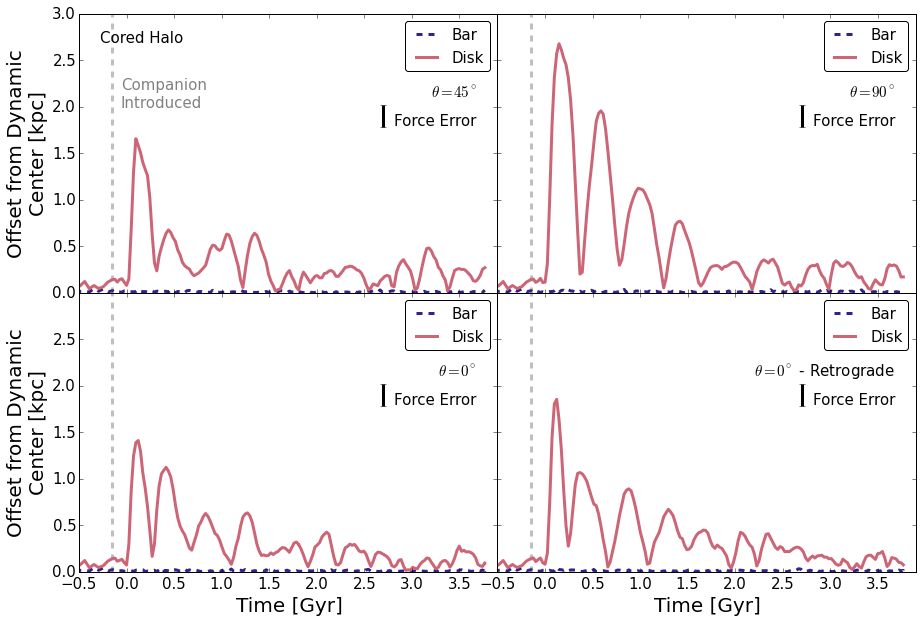

In [45]:
fig = plt.figure(figsize=(15, 10))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

for group, ax in zip(Starsgroups, grid):
    
    diskdyn_dist_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    bardyn_dist_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()] -
                    DehnenOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    
    diskdyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    bardyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['bar_pos'][()] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]
 
    time = np.concatenate((IC_times-IC_times[-1], times, times_cont+2))
    bar_dist = np.concatenate((IC_bar_dist, bardyn_dist, bardyn_dist_cont))
    disk_dist = np.concatenate((IC_disk_dist, diskdyn_dist, diskdyn_dist_cont))    
    
    time -= encounter_time
    time *= co.UnitTime_in_Gyr
    
    ax.plot(time, bar_dist, color=colors[0], label='Bar', linestyle='--')
    ax.plot(time, disk_dist, color=colors[1], label='Disk')
    
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
    if i != 0:
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
    ax.set_xlim(-0.5, 3.9)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    if (i == 0) or (i == 2):
        ax.set_ylabel('Offset from Dynamic \nCenter [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    ax.errorbar([2.7], [1.9], yerr=distErrs, color='black')
    ax.annotate('Force Error', xy=(0.95, 0.6), xycoords='axes fraction', fontsize=15, ha='right')
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    ax.axvline(x=-encounter_time, linestyle='--', color='gray', zorder=-1, alpha=0.5)

grid[0].annotate('Companion\nIntroduced', xy=(-encounter_time, 2.), xycoords='data',
                 fontsize=15, ha='left', color='gray', xytext=(10, 0), textcoords='offset points')
    
plt.subplots_adjust(wspace=0.04)  # Default is 0.2
plt.savefig('../../Offsets_paper/plots/BarDiskHalo_distances.pdf', dpi=600, bbox_inches='tight')


## Dynamical center vs. Halo Center

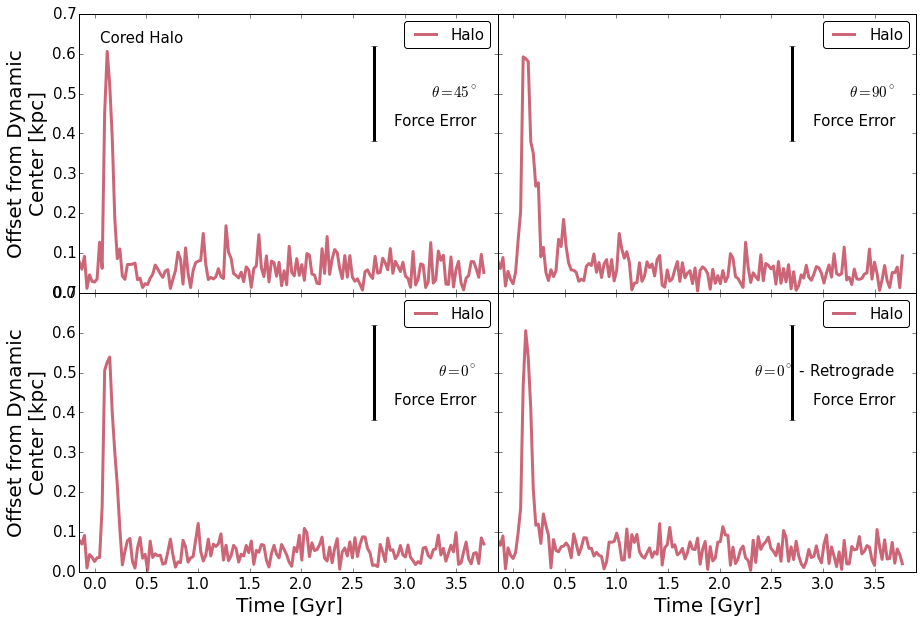

In [56]:
fig = plt.figure(figsize=(15, 10))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

for group, ax in zip(Starsgroups, grid):

    dyn_dist_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['halo_pos'][()] -
                    DehnenOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))

    dyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['halo_pos'][()] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]
 
    time = np.concatenate((times, times_cont+2))
    dyn = np.concatenate((dyn_dist, dyn_dist_cont))    
    
    time -= encounter_time
    time *= co.UnitTime_in_Gyr
    
    ax.plot(time, dyn, color=colors[1], label='Halo')
    
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
    if i != 0:
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
    ax.set_xlim(-encounter_time, 3.9)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    if (i == 0) or (i == 2):
        ax.set_ylabel('Offset from Dynamic \nCenter [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    ax.errorbar([2.7], [0.5], yerr=distErrs, color='black')
    ax.annotate('Force Error', xy=(0.95, 0.6), xycoords='axes fraction', fontsize=15, ha='right')
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    
plt.subplots_adjust(wspace=0.04)  # Default is 0.2
plt.savefig('../../Offsets_paper/plots/Halo_DynCenter_dist.pdf', dpi=600, bbox_inches='tight')


## Cusp vs. Core

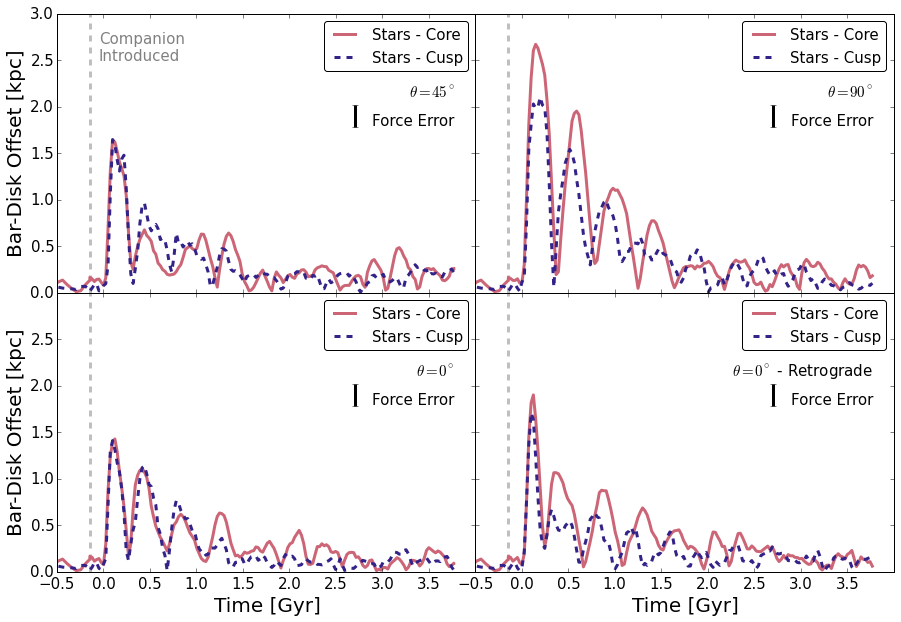

In [46]:
fig = plt.figure(figsize=(15, 10))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

IC_times = DehnenOffsets['stars/IC']['time'][()]

srt = np.argsort(IC_times)
IC_bar_offset = DehnenOffsets['stars/IC']['bar_offset'][()][srt][-10:]
IC_bar_dist = DehnenOffsets['stars/IC']['bar_dist'][()][srt][-10:]
IC_disk_dist = DehnenOffsets['stars/IC']['disk_dist'][()][srt][-10:]
IC_times = IC_times[srt][-10:]

IC_times -= IC_times[-1]


for group, ax in zip(Starsgroups, grid):

    bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                      DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                     axis=1))
    
    bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                 DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

    time = np.concatenate((IC_times, times, times_cont+2))
    offset = np.concatenate((IC_bar_offset, bar_offset, bar_offset_cont))

    time -= encounter_time
    time *= co.UnitTime_in_Gyr
    ax.plot(time, offset, color=colors[1], label='Stars - Core')
    
Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']
    

#distErrs = np.std(IC_bar_dist)

IC_times = HernOffsets['stars/IC']['time'][()]

srt = np.argsort(IC_times)
IC_bar_offset = HernOffsets['stars/IC']['bar_offset'][()][srt][-10:]
IC_bar_dist = HernOffsets['stars/IC']['bar_dist'][()][srt][-10:]
IC_disk_dist = HernOffsets['stars/IC']['disk_dist'][()][srt][-10:]
IC_times = IC_times[srt][-10:]

IC_times -= IC_times[-1]

for group, ax in zip(Starsgroups, grid):

    bar_offset_cont = np.sqrt(np.sum((HernOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                      HernOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                     axis=1))
    
    bar_offset = np.sqrt(np.sum((HernOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                 HernOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                axis=1))
    times = HernOffsets_new['%s/main'%group]['time'][()]
    times_cont = HernOffsets_continue['%s/continue'%group]['time'][()]

    time = np.concatenate((IC_times, times, times_cont + 2))
    offset = np.concatenate((IC_bar_offset, bar_offset, bar_offset_cont))

    time -= encounter_time
    time *= co.UnitTime_in_Gyr
    ax.plot(time, offset, color=colors[0], label='Stars - Cusp', linestyle='--')
    
for i, (ax, name) in enumerate(zip(grid, names)):
    ax.axvline(x=-encounter_time, linestyle='--', color='gray', zorder=-1, alpha=0.5)
    ax.set_xlim(-0.5, 4)
    #ax.set_ylim(0, 1.75)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel('Bar-Disk Offset [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i != 0:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        xticks[-1].label1.set_visible(False)

    ax.errorbar([2.7], [1.9], yerr=distErrs, color='black')
    ax.annotate('Force Error', xy=(0.95, 0.6), xycoords='axes fraction', fontsize=15, ha='right')
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
        

grid[0].annotate('Companion\nIntroduced', xy=(-encounter_time, 2.5), xycoords='data',
                 fontsize=15, ha='left', color='gray', xytext=(10, 0), textcoords='offset points')

plt.savefig('../../Offsets_paper/plots/CoreCusp_Offsets.pdf', dpi=600, bbox_inches='tight')

## Different Disk Density Cutoffs

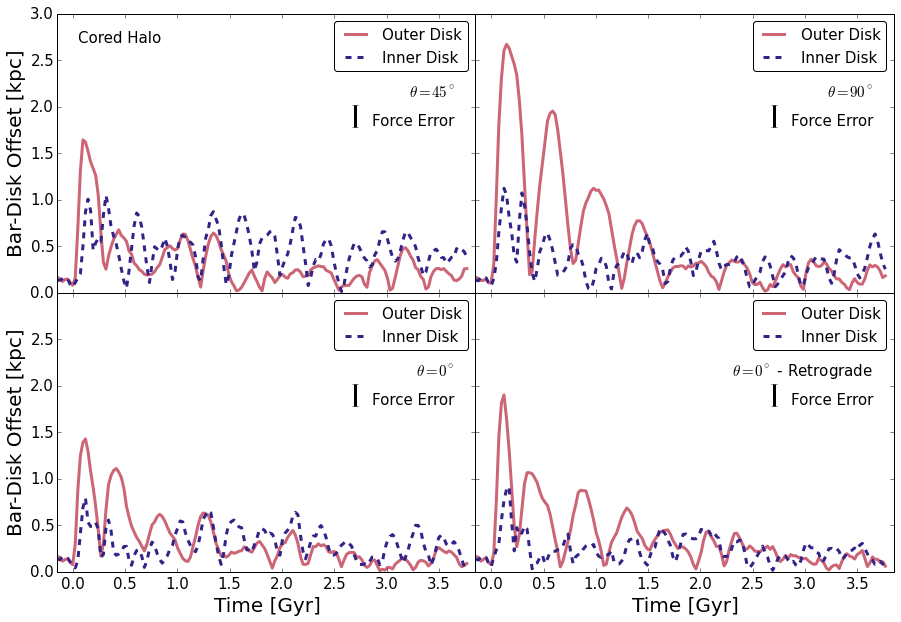

In [88]:
fig = plt.figure(figsize=(15, 10))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']


for group, ax in zip(Starsgroups, grid):

    bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                      DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                     axis=1))
    
    bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                 DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

    time = np.concatenate((times, times_cont+2))
    offset = np.concatenate((bar_offset, bar_offset_cont))

    time -= encounter_time
    time *= co.UnitTime_in_Gyr
    ax.plot(time, offset, color=colors[1], label='Outer Disk')

    
#Using an inner disk cutoff    

for group, ax in zip(Starsgroups, grid):

    bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 1] -
                                      DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                     axis=1))
    
    bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 1] -
                                 DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

    time = np.concatenate((times, times_cont+2))
    offset = np.concatenate((bar_offset, bar_offset_cont))

    time -= encounter_time
    time *= co.UnitTime_in_Gyr
    ax.plot(time, offset, color=colors[0], label='Inner Disk', linestyle='--')

    
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
    ax.set_xlim(-0.15, 4-0.15)
    #ax.set_ylim(0, 1.75)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel('Bar-Disk Offset [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i != 0:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        xticks[-1].label1.set_visible(False)

    ax.errorbar([2.7], [1.9], yerr=distErrs, color='black')
    ax.annotate('Force Error', xy=(0.95, 0.6), xycoords='axes fraction', fontsize=15, ha='right')
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
        
plt.savefig('../../Offsets_paper/plots/InnerOuterDisk_Offsets.pdf', dpi=600, bbox_inches='tight')

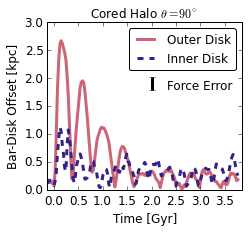

In [63]:
fig, axis = plt.subplots(1, figsize=(3.5, 3))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']
group = '/stars/90deg'
name =  r'$\theta = 90^{\circ}$'

bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                  DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                 axis=1))

bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                             DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                            axis=1))
times = DehnenOffsets_new['%s/main'%group]['time'][()]
times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

time = np.concatenate((times, times_cont+2))
offset = np.concatenate((bar_offset, bar_offset_cont))

time -= encounter_time
time *= co.UnitTime_in_Gyr
axis.plot(time, offset, color=colors[1], label='Outer Disk')

    
#Using an inner disk cutoff    


bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 1] -
                                  DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                 axis=1))

bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 1] -
                             DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                            axis=1))
times = DehnenOffsets_new['%s/main'%group]['time'][()]
times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

time = np.concatenate((times, times_cont+2))
offset = np.concatenate((bar_offset, bar_offset_cont))

time -= encounter_time
time *= co.UnitTime_in_Gyr
axis.plot(time, offset, color=colors[0], label='Inner Disk', linestyle='--')

#axis.annotate("Cored Halo", xy=(0.05, 0.9),
#           color='black', xycoords='axes fraction', fontsize=12, ha='left')
axis.set_xlim(-0.15, 4-0.15)
#ax.set_ylim(0, 1.75)
axis.legend(fancybox=True, loc='upper right', fontsize=12)
axis.set_ylabel('Bar-Disk Offset [kpc]', fontsize=12)
axis.set_xlabel("Time [Gyr]", fontsize=12)

matplotlib.rc('xtick', labelsize=5) 
matplotlib.rc('ytick', labelsize=5) 

axis.errorbar([2], [1.9], yerr=distErrs, color='black')
axis.annotate('Force Error', xy=(0.95, 0.6), xycoords='axes fraction', fontsize=12, ha='right')
#axis.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=12, ha='right')

axis.set_title('Cored Halo, %s'%name)

plt.savefig('../../Offsets_paper/plots/InnerOuterDisk_Offsets_onepanel.pdf', dpi=600, bbox_inches='tight')

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

## Quantifying the core-cusp difference

Dehnen. Avg. offset: 0.320425 +/- 0.295041 kpc
Dehnen. Max/Min offset: 1.64391/0.02053 kpc
Hernquist. Avg. offset: 0.309256 +/- 0.308439 kpc
Hernquist. Max/Min offset: 1.64706/0.00666885 kpc
Dehnen. Avg. offset: 0.545496 +/- 0.615684 kpc
Dehnen. Max/Min offset: 2.67189/0.0174309 kpc
Hernquist. Avg. offset: 0.443311 +/- 0.483543 kpc
Hernquist. Max/Min offset: 2.1032/0.00958274 kpc
Dehnen. Avg. offset: 0.314307 +/- 0.290098 kpc
Dehnen. Max/Min offset: 1.42838/0.0128763 kpc
Hernquist. Avg. offset: 0.255982 +/- 0.299062 kpc
Hernquist. Max/Min offset: 1.41106/0.0120216 kpc
Dehnen. Avg. offset: 0.365347 +/- 0.335265 kpc
Dehnen. Max/Min offset: 1.90194/0.0196354 kpc
Hernquist. Avg. offset: 0.25099 +/- 0.257015 kpc
Hernquist. Max/Min offset: 1.70924/0.0067349 kpc


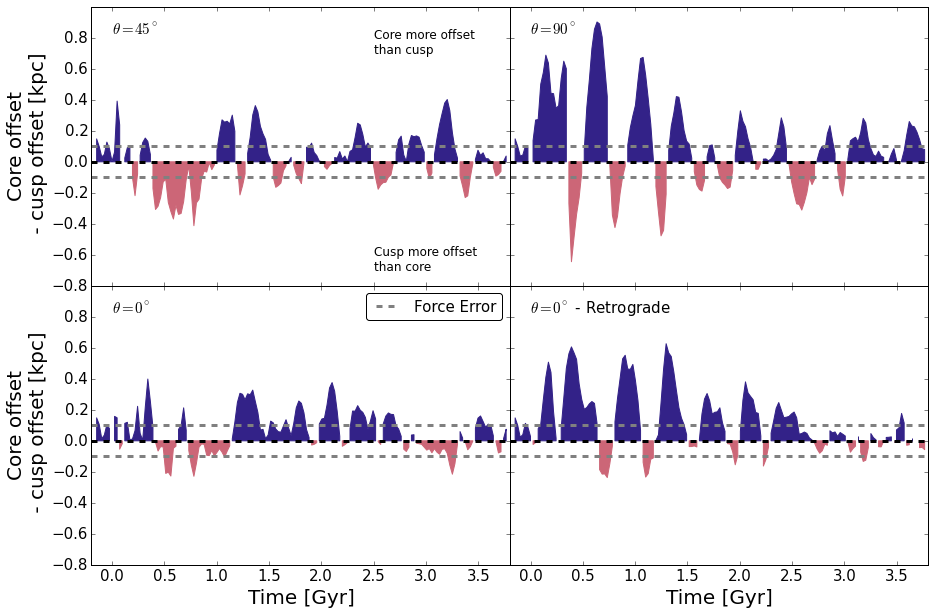

In [89]:
fig = plt.figure(figsize=(15, 10))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

for group, ax in zip(Starsgroups, grid):

    bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                      DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                     axis=1))
    
    bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                 DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                axis=1))
    times = DehnenOffsets_new['%s/main'%group]['time'][()]
    times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

    time_dehnen = np.concatenate((times, times_cont+2))
    offset_dehnen = np.concatenate((bar_offset, bar_offset_cont))

    time_dehnen -= encounter_time
    time_dehnen *= co.UnitTime_in_Gyr

    print "Dehnen. Avg. offset: {:g} +/- {:g} kpc".format(offset_dehnen.mean(),
                                                      np.std(offset_dehnen))
    print "Dehnen. Max/Min offset: {:g}/{:g} kpc".format(offset_dehnen.max(),
                                                         offset_dehnen.min()) 

    bar_offset_cont = np.sqrt(np.sum((HernOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                      HernOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                     axis=1))
    
    bar_offset = np.sqrt(np.sum((HernOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                 HernOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                axis=1))
    times = HernOffsets_new['%s/main'%group]['time'][()]
    times_cont = HernOffsets_continue['%s/continue'%group]['time'][()]

    time_hern = np.concatenate((times, times_cont + 2))
    offset_hern = np.concatenate((bar_offset, bar_offset_cont))

    time_hern -= encounter_time
    time_hern *= co.UnitTime_in_Gyr
    
    print "Hernquist. Avg. offset: {:g} +/- {:g} kpc".format(offset_hern.mean(),
                                                      np.std(offset_hern))
    print "Hernquist. Max/Min offset: {:g}/{:g} kpc".format(offset_hern.max(),
                                                         offset_hern.min()) 
    
    
    y = (offset_dehnen-offset_hern)
    
    #ax.plot(time_dehnen[y > 0], y[y > 0],
    #        color=colors[0])
    #ax.plot(time_dehnen[y < 0], y[y < 0],
    #        color=colors[1])

    
    ax.fill_between(time_dehnen, y,
            0.0, color=colors[0], where=y > 0)
    ax.fill_between(time_dehnen, y,
            0.0, color=colors[1], where=y < 0)
    ax.axhline(y=0, linestyle='--', color='black')
    ax.axhline(y=0.1, linestyle='--', color='gray', label='Force Error')
    ax.axhline(y=-0.1, linestyle='--', color='gray')

    
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 3:
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.set_xlim(-0.2, 3.8)
    #ax.set_ylim(0, 1.75)
    
    ax.set_ylabel('Core offset \n - cusp offset [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    ax.annotate(name, xy=(0.05, 0.9), color='black', xycoords='axes fraction', fontsize=15)
    if i >= 0:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        xticks[-1].label1.set_visible(False)
    if i == 2:
        ax.legend(fancybox=True, loc='upper right', fontsize=15)
    
#grid[2].arrow(3.5, 0, 0.0, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
grid[0].text(2.5, 0.7, 'Core more offset\nthan cusp', fontsize=12)

#grid[2].arrow(3.5, 0, 0.0, -0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
grid[0].text(2.5, -0.7, 'Cusp more offset\nthan core', fontsize=12)

plt.savefig('../../Offsets_paper/plots/CoreCusp_Difference.pdf', dpi=600, bbox_inches='tight')

## Gas - Bar

In [ ]:
fig = plt.figure(figsize=(15, 10))

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

Gasgroups = ['/gas/45deg',
             '/gas/90deg',
             '/gas/0deg',
             '/gas/0deg_retro']

IC_times = DehnenOffsets['stars/IC']['time'][()]
srt = np.argsort(IC_times)
IC_bar_offset = DehnenOffsets['stars/IC']['bar_offset'][()][srt][-20:]
IC_bar_dist = DehnenOffsets['stars/IC']['bar_dist'][()][srt][-20:]
IC_disk_dist = DehnenOffsets['stars/IC']['disk_dist'][()][srt][-20:]
IC_times = IC_times[srt][-20:]

IC_gas_times = DehnenOffsets['gas/IC']['time'][()]
srt = np.argsort(IC_gas_times)
IC_gas_bar_offset = DehnenOffsets['gas/IC']['bar_offset'][()][srt][-20:]
IC_gas_bar_dist = DehnenOffsets['gas/IC']['bar_dist'][()][srt][-20:]
IC_gas_disk_dist = DehnenOffsets['gas/IC']['disk_dist'][()][srt][-20:]
IC_gas_times = IC_gas_times[srt][-20:]

for Gasgroup, Stargroup, ax in zip(Gasgroups, Starsgroups, grid):

    times = DehnenOffsets_best[Stargroup]['time'][()]
    srt = np.argsort(times)
    times = times[srt]
    bar_offset = DehnenOffsets_best[Stargroup]['bar_offset'][()][srt]
    bar_dist = DehnenOffsets_best[Stargroup]['bar_dist'][()][srt]
    disk_dist = DehnenOffsets_best[group]['disk_dist'][()][srt]

    gas_times = DehnenOffsets_best[Gasgroup]['time'][()]
    srt = np.argsort(gas_times)
    gas_times = gas_times[srt]
    gas_bar_offset = DehnenOffsets_best[Gasgroup]['bar_offset'][()][srt]
    gas_bar_dist = DehnenOffsets_best[Gasgroup]['bar_dist'][()][srt]
    gas_disk_dist = DehnenOffsets_best[Gasgroup]['disk_dist'][()][srt]
    
    time = np.append(IC_times-IC_times[-1], times)
    offset = np.append(IC_bar_offset, bar_offset)

    gas_time = np.append(IC_gas_times-IC_gas_times[-1], gas_times)
    gas_offset = np.append(IC_gas_bar_offset, gas_bar_offset)

    ax.plot(time, offset, color=colors[1], label='Stars - Core')
    ax.plot(gas_time, gas_offset, color=colors[0], label='Gas - Core', linestyle='--')
        
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0: 
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.set_xlim(-1, 2)
    #ax.set_ylim(0, 2.0)
    ax.errorbar([-0.75], [0.6], yerr=distErrs, color='black')
    ax.text(-0.7, 0.6, 'Typical Error')
    ax.legend(fancybox=True, loc='upper right')
    ax.set_ylabel('Bar-Disk Offset [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    ax.annotate(name, xy=(0.05, 0.8), color='black', xycoords='axes fraction',
                bbox=dict(facecolor='gray', edgecolor='black',
                          boxstyle='round, pad=1', alpha=0.5))
    if i >= 0:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        xticks[-1].label1.set_visible(False)
        
#plt.savefig('../Offsets_paper/plots/GasStars_Offsets.pdf', dpi=300)

## Gas and Stars - Velocity fields

In [8]:
def prepare_centers(group, haloCenters):
    with h5py.File('../Data/centers_stellar_fitting.hdf5', 'r') as f:
        errors = f['Dehnen/%s'%group]['errors'][()]
        centers = f['Dehnen/%s'%group]['centers'][()]
    
    for i in xrange(82):
        bad_ind = ~(errors[i, :, 0] < 0.5) * ~(errors[i, :, 1] < 0.5)
        centers[i, bad_ind, :] = [np.nan, np.nan]
    
    offsets = np.empty((82, 10000))
    for i in xrange(82):
        offsets[i, :] = np.sqrt((centers[i, :, 0]-haloCenters[i, 0])**2 +
                                (centers[i, :, 1]-haloCenters[i, 1])**2)      

    offsets_avg = np.zeros((82, 3))
    offsets_avg[:, 0] = np.nanmean(offsets, axis=1)
    offsets_avg[:, 1] = np.nanpercentile(offsets, 16, axis=1)
    offsets_avg[:, 2] = np.nanpercentile(offsets, 84, axis=1)
    
    return offsets_avg

In [9]:
offsetsStellarVelocity = h5py.File('../Data/offsetsStellarVelocity.hdf5', 'r')
#offsetsStellarVelocity.close()

45deg
0.433542 1.65718
(0.28800369478667681, 1.2780886338367727)
After peak. disk: 0.418342, vel: 0.289303
90deg
0.87629 2.67809
(0.48032331530431804, 2.7255860892717942)
After peak. disk: 0.847496, vel: 0.474746
0deg
0.465578 1.41171
(0.25013771456377593, 0.97495801767070134)
After peak. disk: 0.446822, vel: 0.232092
0deg_retro
0.545231 1.85434
(0.26867867813041074, 1.3830299050317267)
After peak. disk: 0.52411, vel: 0.247891


/usr/users/spardy/.local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


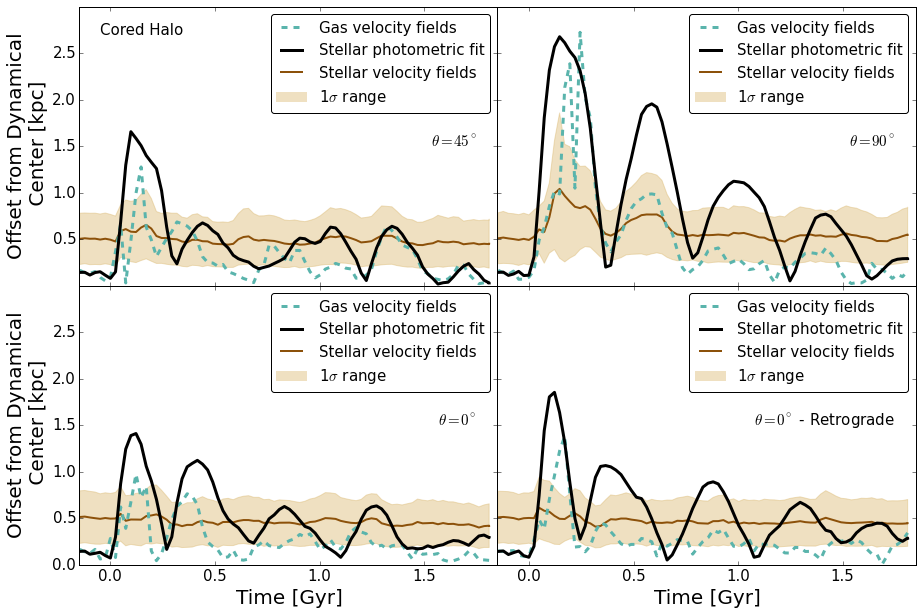

In [12]:
fig = plt.figure(figsize=(15, 10))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

groups = ['45deg',
          '90deg',
          '0deg',
          '0deg_retro']


for group, ax in zip(groups, grid):

    velcents2d = np.loadtxt('/usr/users/spardy/coors/data/2dVels/xy_%s.txt' % group)
    velcents2d = np.array(velcents2d).reshape(len(velcents2d)/2, 2, order='F')
    
    times = DehnenOffsets_new['/stars/'+group+'/main']['time'][()]
    diskdyn_dist = np.sqrt(np.sum((DehnenOffsets_new['/stars/%s/main'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_new['/stars/%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
    haloCenters = DehnenOffsets_new['/stars/'+group+'/main']['dynamical_center'][:, 0:2]
    
    times -= encounter_time
    times *= co.UnitTime_in_Gyr
    
    ax.plot(times[:-1],
            np.sqrt(np.sum((velcents2d-haloCenters[:-1, :])**2, axis=1)),
            label='Gas velocity fields', color='#5ab4ac', linestyle='--')      

    ax.plot(times, diskdyn_dist, color='black', label='Stellar photometric fit')

    print group
    print diskdyn_dist.mean(), diskdyn_dist.max()
    
    peak = np.argmax(diskdyn_dist)
    
    print (np.sqrt(np.sum((velcents2d-haloCenters[:-1, :])**2, axis=1)).mean(),
                  np.sqrt(np.sum((velcents2d-haloCenters[:-1, :])**2, axis=1)).max())
    
    print "After peak. disk: %g, vel: %g" % (diskdyn_dist[peak+2:].mean(),
                                             np.sqrt(np.sum((velcents2d-haloCenters[:-1, :])**2, axis=1))[peak+2:].mean())
    
    offsets_avg = prepare_centers(group, haloCenters)
    ax.plot(times, offsets_avg[:, 0], color='#8c510a', zorder=-1, linewidth=2,
            label='Stellar velocity fields')
    ax.fill_between(times, offsets_avg[:, 1], offsets_avg[:, 2], color='#d8b365',
                    zorder=-1, alpha=0.4, label=r'1$\sigma$')

    ax.plot([], [], color='#d8b365', linewidth=10, alpha=0.4, label=r'1$\sigma$ range')
    
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15)
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.set_xlim(-0.15, 2-0.15)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel('Offset from Dynamical\n Center [kpc]', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    ax.annotate(name, xy=(0.95, 0.5), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    if i >= 0:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        xticks[-1].label1.set_visible(False)
        
plt.savefig('../../Offsets_paper/plots/GasStars_Offsets.pdf', dpi=600, bbox_inches='tight')

## Single Panel version

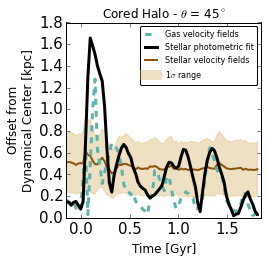

In [22]:
fig, axis = plt.subplots(1, figsize=(3.5, 3.5))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']


group = '45deg'
name = r"$\theta$ = 45$^{\circ}$"

velcents2d = np.loadtxt('/usr/users/spardy/coors/data/2dVels/xy_%s.txt' % group)
velcents2d = np.array(velcents2d).reshape(len(velcents2d)/2, 2, order='F')

times = DehnenOffsets_new['/stars/'+group+'/main']['time'][()]
diskdyn_dist = np.sqrt(np.sum((DehnenOffsets_new['/stars/%s/main'%group]['disk_pos'][:, :, 0] -
                DehnenOffsets_new['/stars/%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
haloCenters = DehnenOffsets_new['/stars/'+group+'/main']['dynamical_center'][:, 0:2]

times -= encounter_time
times *= co.UnitTime_in_Gyr

axis.plot(times[:-1],
        np.sqrt(np.sum((velcents2d-haloCenters[:-1, :])**2, axis=1)),
        label='Gas velocity fields', color='#5ab4ac', linestyle='--')      

axis.plot(times, diskdyn_dist, color='black', label='Stellar photometric fit')

peak = np.argmax(diskdyn_dist)

axis.plot(times, offsets_avg[:, 0], color='#8c510a', zorder=-1, linewidth=2,
        label='Stellar velocity fields')
axis.fill_between(times, offsets_avg[:, 1], offsets_avg[:, 2], color='#d8b365',
                zorder=-1, alpha=0.4, label=r'1$\sigma$')

axis.plot([], [], color='#d8b365', linewidth=10, alpha=0.4, label=r'1$\sigma$ range')
    
axis.set_title("Cored Halo - %s" % name)

axis.set_xlim(-0.15, 2-0.15)
axis.legend(fancybox=True, loc='upper right', fontsize=8)
axis.set_ylabel('Offset from\nDynamical Center [kpc]', fontsize=12)
axis.set_xlabel("Time [Gyr]", fontsize=12)

plt.savefig('../../thesis_proposal/GasStars_Offsets_single.pdf', dpi=600, bbox_inches='tight')

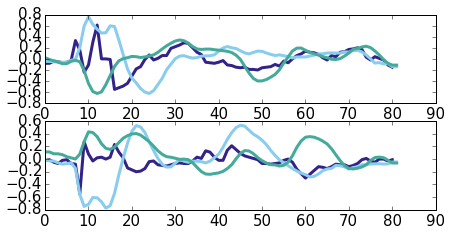

In [21]:
group = '45deg'

fig, axes = plt.subplots(2, 1, figsize=(7, 3.5))

velcents2d = np.loadtxt('/usr/users/spardy/coors/data/2dVels/xy_%s.txt' % group)
velcents2d = np.array(velcents2d).reshape(len(velcents2d)/2, 2, order='F')
axes[0].plot(velcents2d[:, 0])
axes[1].plot(velcents2d[:, 1])

axes[0].plot(DehnenOffsets_new['/stars/%s/main'%group]['disk_pos'][:, 0, 0])
axes[1].plot(DehnenOffsets_new['/stars/%s/main'%group]['disk_pos'][:, 1, 0])

axes[0].plot(DehnenOffsets_new['/stars/'+group+'/main']['dynamical_center'][:, 0])
axes[1].plot(DehnenOffsets_new['/stars/'+group+'/main']['dynamical_center'][:, 1])

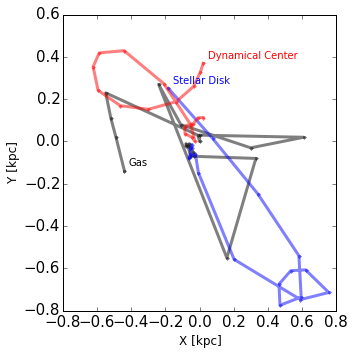

In [51]:
fig, axis = plt.subplots(1, figsize=(5, 5))

axis.plot(velcents2d[:20, 0], velcents2d[:20, 1], 'k.-', alpha=0.5)
axis.annotate('Gas', (velcents2d[19, 0], velcents2d[19, 1]), xytext=(5, 5), textcoords='offset points', color='black')

disk = DehnenOffsets_new['/stars/%s/main'%group]['disk_pos'][:, :, 0]
axis.plot(disk[:20, 0], disk[:20, 1], 'b.-', alpha=0.5)
axis.annotate('Stellar Disk', (disk[19, 0], disk[19, 1]), xytext=(5, 5), textcoords='offset points', color='blue')

halo = (DehnenOffsets_new['/stars/'+group+'/main']['dynamical_center'])
axis.plot(halo[:20, 0], halo[:20, 1], 'r.-', alpha=0.5)
axis.annotate('Dynamical Center', (halo[19, 0], halo[19, 1]), xytext=(5, 5), textcoords='offset points', color='red')


bar = DehnenOffsets_new['/stars/%s/main'%group]['bar_pos']
#axis.plot(bar[:20, 0], bar[:20, 1], 'g.-', alpha=0.5)


axis.set_xlabel('X [kpc]', fontsize=12)
axis.set_ylabel('Y [kpc]', fontsize=12)

plt.tight_layout()

plt.savefig('../../research_notes/May3/centers.pdf', dpi=600)

In [ ]:
#fig, axis = plt.subplots(1, figsize=(3.5, 3.5))

group = '45deg'
name = r"$\theta$ = 45$^{\circ}$"

velcents2d = np.loadtxt('/usr/users/spardy/coors/data/2dVels/xy_%s.txt' % group)
velcents2d = np.array(velcents2d).reshape(len(velcents2d)/2, 2, order='F')

times = DehnenOffsets_new['/stars/'+group+'/main']['time'][()]
diskdyn_dist = np.sqrt(np.sum((DehnenOffsets_new['/stars/%s/main'%group]['disk_pos'][:, :, 0] -
                DehnenOffsets_new['/stars/%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))
haloCenters = DehnenOffsets_new['/stars/'+group+'/main']['dynamical_center'][:, 0:2]

times -= encounter_time
times *= co.UnitTime_in_Gyr

axis.plot(times[:-1],
        np.sqrt(np.sum((velcents2d-haloCenters[:-1, :])**2, axis=1)),
        label='Gas velocity fields', color='#5ab4ac', linestyle='--')      

axis.plot(times, diskdyn_dist, color='black', label='Stellar photometric fit')

peak = np.argmax(diskdyn_dist)

axis.plot(times, offsets_avg[:, 0], color='#8c510a', zorder=-1, linewidth=2,
        label='Stellar velocity fields')
axis.fill_between(times, offsets_avg[:, 1], offsets_avg[:, 2], color='#d8b365',
                zorder=-1, alpha=0.4, label=r'1$\sigma$')

axis.plot([], [], color='#d8b365', linewidth=10, alpha=0.4, label=r'1$\sigma$ range')
    
axis.set_title("Cored Halo - %s" % name)

axis.set_xlim(-0.15, 2-0.15)
axis.legend(fancybox=True, loc='upper right', fontsize=8)
axis.set_ylabel('Offset from\nDynamical Center [kpc]', fontsize=12)
axis.set_xlabel("Time [Gyr]", fontsize=12)

In [ ]:
gadget_bar_offset = HernOffsets['Gas/45deg']['bar_offset'][()]
gadget_times = HernOffsets['Gas/45deg']['time'][()]


fig, axes = plt.subplots(1, 2, figsize=(15, 7.5), sharey=True)
with h5py.File('offSetsGizmo.hdf5', 'r') as GizmoOffsets:
    timesLowres = GizmoOffsets['Gas/lowres']['time'][()]
    timesHires = GizmoOffsets['Gas/hires']['time'][()]

    bar_offset_Lowres = GizmoOffsets['Gas/lowres']['bar_offset'][()]
    bar_offset_Hires = GizmoOffsets['Gas/hires']['bar_offset'][()]

    print(bar_offset_Lowres)
    
    axes[0].plot(timesLowres, bar_offset_Lowres, label='GIZMO')
    axes[0].plot(timesHires, bar_offset_Hires, label='GIZMO 2xResolution')
    axes[0].plot(gadget_times, gadget_bar_offset, label='Gadget')
    axes[0].set_ylabel('Offset [kpc]', fontsize=20)
    
    axes[0].set_title('Gas', fontsize=15)
    
    gadget_bar_offset = HernOffsets['Stars/45deg']['bar_offset'][()]
    bar_offset_Lowres = GizmoOffsets['Stars/lowres']['bar_offset'][()]
    bar_offset_Hires = GizmoOffsets['Stars/hires']['bar_offset'][()]

    axes[1].plot(timesLowres, bar_offset_Lowres, label='GIZMO')
    axes[1].plot(timesHires, bar_offset_Hires, label='GIZMO 2xResolution')
    axes[1].plot(gadget_times, gadget_bar_offset, label='Gadget')
   
    axes[1].set_title('Stars', fontsize=15)

    
for axis in axes:
    axis.set_xlabel('Time [Gyr]', fontsize=20)
    axis.legend()
    
plt.tight_layout()
plt.savefig('../Offsets_paper/plots/Gizmo_test.pdf', dpi=300)

## Fourier Modes

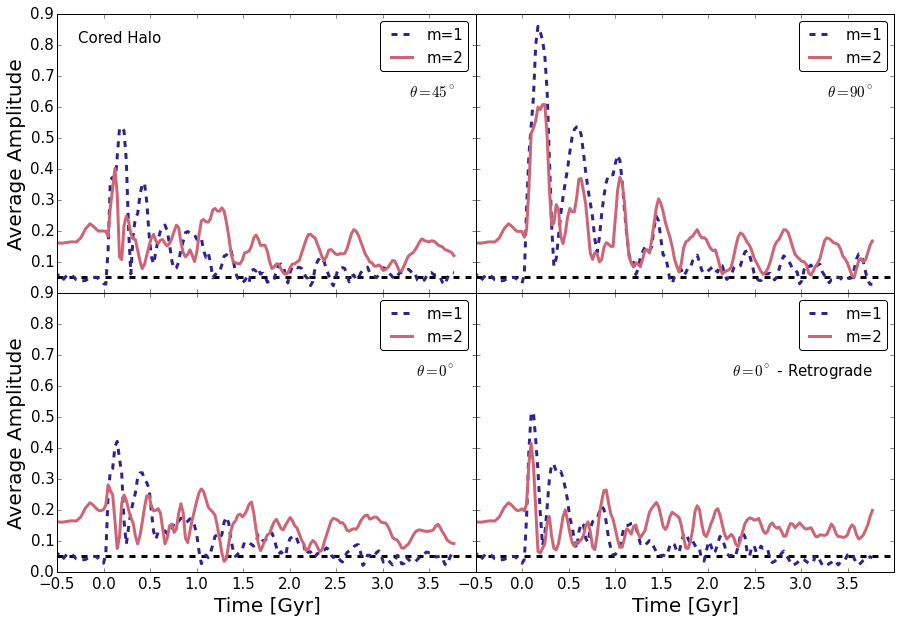

In [110]:
fig = plt.figure(figsize=(15, 10))

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes,\
     h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as ContModes:
    # Dehnen
    IC_times = Modes['/stars/IC']['time'][()][-10:]
    IC_times -= IC_times[-1]
    IC_times -=  encounter_time
    IC_m1 = Modes['/stars/IC']['m1'][()][-10:]
    IC_m2 = Modes['/stars/IC']['m2'][()][-10:]

    for group, ax in zip(Starsgroups, grid):
        times = Modes["%s/main"%group]['time'][()] - encounter_time
        m1s = Modes["%s/main"%group]['m1'][()]
        m2s = Modes["%s/main"%group]['m2'][()]
        times_cont = ContModes["%s/continue"%group]['time'][()] - encounter_time + 2
        m1s_cont = ContModes["%s/continue"%group]['m1'][()]
        m2s_cont = ContModes["%s/continue"%group]['m2'][()]

        time = np.concatenate((IC_times, times, times_cont))
        m1 = np.concatenate((IC_m1, m1s, m1s_cont))
        m2 = np.concatenate((IC_m2, m2s, m2s_cont))

        time *= co.UnitTime_in_Gyr
        ax.plot(time, m1, color=colors[0], label='m=1', linestyle='--')
        ax.plot(time, m2, color=colors[1], label='m=2')
        
        
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.axhline(y=0.05, zorder=-1, color='black', linestyle='--')
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    ax.set_xlim(-0.5, 4)
    #ax.set_ylim(0, 0.6)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel('Average Amplitude', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i >= 0:
        xticks = ax.xaxis.get_major_ticks()
        xticks[-1].label1.set_visible(False)


        
#plt.savefig('../../Offsets_paper/plots/DehnenFourierModes.pdf', dpi=600, bbox_inches='tight')

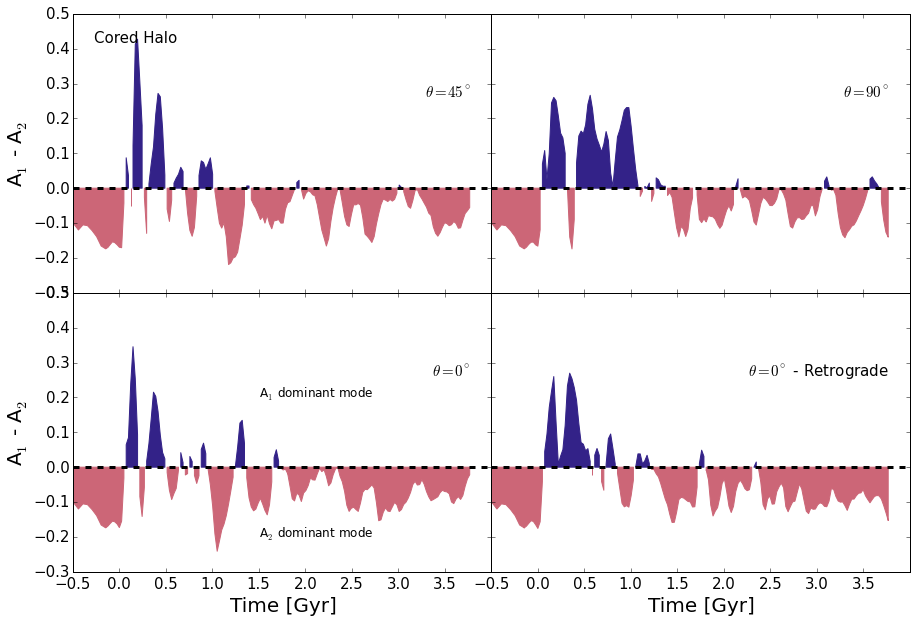

In [12]:
fig = plt.figure(figsize=(15, 10))

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes,\
     h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as ContModes:
    # Dehnen
    IC_times = Modes['/stars/IC']['time'][()][-10:]
    IC_times -= IC_times[-1]
    IC_times -=  encounter_time
    IC_m1 = Modes['/stars/IC']['m1'][()][-10:]
    IC_m2 = Modes['/stars/IC']['m2'][()][-10:]

    for group, ax in zip(Starsgroups, grid):
        times = Modes["%s/main"%group]['time'][()] - encounter_time
        m1s = Modes["%s/main"%group]['m1'][()]
        m2s = Modes["%s/main"%group]['m2'][()]
        times_cont = ContModes["%s/continue"%group]['time'][()] - encounter_time + 2
        m1s_cont = ContModes["%s/continue"%group]['m1'][()]
        m2s_cont = ContModes["%s/continue"%group]['m2'][()]

        time = np.concatenate((IC_times, times, times_cont))
        m1 = np.concatenate((IC_m1, m1s, m1s_cont))
        m2 = np.concatenate((IC_m2, m2s, m2s_cont))

        time *= co.UnitTime_in_Gyr  
    
        y = (m1-m2)

        ax.fill_between(time, y,
                0.0, color=colors[0], where=y > 0)
        ax.fill_between(time, y,
                0.0, color=colors[1], where=y < 0)
        ax.axhline(y=0, linestyle='--', color='black')        
        
        
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    ax.set_xlim(-0.5, 4)
    #ax.set_ylim(0, 0.6)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel('A$_1$ - A$_2$', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i >= 0:
        xticks = ax.xaxis.get_major_ticks()
        xticks[-1].label1.set_visible(False)
    
#grid[2].arrow(3.5, 0, 0.0, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
grid[2].text(1.5, 0.2, 'A$_1$ dominant mode', fontsize=12)

#grid[2].arrow(3.5, 0, 0.0, -0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
grid[2].text(1.5, -0.2, 'A$_2$ dominant mode', fontsize=12)

#plt.savefig('../../Offsets_paper/plots/CoreCusp_Difference.pdf', dpi=600, bbox_inches='tight')

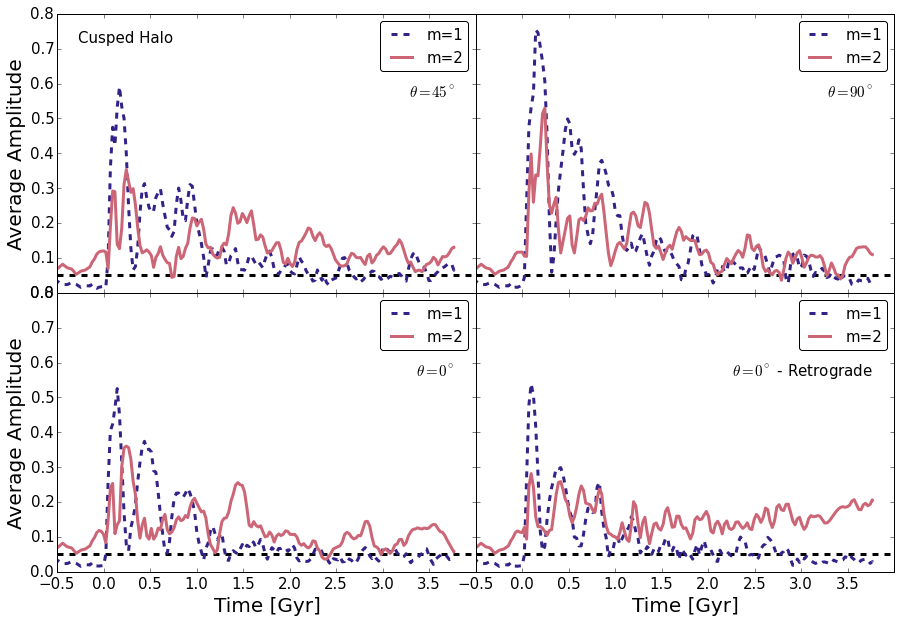

In [23]:
fig = plt.figure(figsize=(15, 10))

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

with h5py.File('../Data/fouriermodesHern_disk.hdf5', 'r') as Modes,\
     h5py.File('../Data/fouriermodesHern_diskcontinue.hdf5', 'r') as ContModes:
    IC_times = Modes['/stars/IC']['time'][()][-10:]
    IC_times -= IC_times[-1]
    IC_times -=  encounter_time
    IC_m1 = Modes['/stars/IC']['m1'][()][-10:]
    IC_m2 = Modes['/stars/IC']['m2'][()][-10:]

    for group, ax in zip(Starsgroups, grid):
        times = Modes["%s/main"%group]['time'][()] - encounter_time
        m1s = Modes["%s/main"%group]['m1'][()]
        m2s = Modes["%s/main"%group]['m2'][()]
        times_cont = ContModes["%s/continue"%group]['time'][()] - encounter_time + 2
        m1s_cont = ContModes["%s/continue"%group]['m1'][()]
        m2s_cont = ContModes["%s/continue"%group]['m2'][()]

        time = np.concatenate((IC_times, times, times_cont))
        m1 = np.concatenate((IC_m1, m1s, m1s_cont))
        m2 = np.concatenate((IC_m2, m2s, m2s_cont))

        time *= co.UnitTime_in_Gyr
        
        ax.plot(time, m1, color=colors[0], label='m=1', linestyle='--')
        ax.plot(time, m2, color=colors[1], label='m=2')
        
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cusped Halo", xy=(0.05, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
    ax.axhline(y=0.05, zorder=-1, color='black', linestyle='--')
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    ax.set_xlim(-0.5, 4)
    #ax.set_ylim(0, 0.6)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel('Average Amplitude', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i >= 0:
        xticks = ax.xaxis.get_major_ticks()
        yticks = ax.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)
        xticks[-1].label1.set_visible(False)

plt.savefig('../../Offsets_paper/plots/HernFourierModes.pdf', dpi=600, bbox_inches='tight')

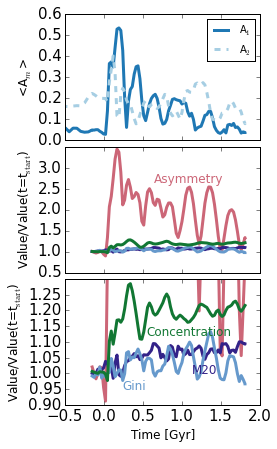

In [91]:
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

fig, axes = plt.subplots(3, figsize=(3.5, 7))
with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes:
    with h5py.File('../Data/morphologyDehnen.hdf5', 'r') as morphologies:
        IC_times = Modes['/stars/IC']['time'][()][-20:]
        IC_m1 = Modes['/stars/IC']['m1'][()][-20:]
        IC_m2 = Modes['/stars/IC']['m2'][()][-20:]

        group = Starsgroups[0]
        times = Modes[group]['main/time'][()]
        m1s = Modes[group]['main/m1'][()]
        m2s = Modes[group]['main/m2'][()]

        time = np.append(IC_times-IC_times[-1], times)
        time -= encounter_time
        time *= co.UnitTime_in_Gyr
        m1 = np.append(IC_m1, m1s)
        m2 = np.append(IC_m2, m2s)

        axes[0].plot(time, m1, color='#1f78b4', label='A$_1$')
        axes[0].plot(time, m2, color='#a6cee3', label='A$_2$', linestyle='--')
        axes[0].set_xlim([-0.5, 2]) 
        axes[0].set_xticklabels([])
        axes[0].set_ylabel('<A$_m$>', fontsize=12)
        axes[0].legend(loc='upper right', fontsize=10)

        axis = axes[1]
        
        times_morph = times
        times_morph -= encounter_time
        times_morph *= co.UnitTime_in_Gyr
        
        m20_sim = morphologies['morphology']['m20'][:]
        a_sim = morphologies['morphology']['asymmetry'][:]
        c_sim = morphologies['morphology']['concentration'][:]
        gini_sim = morphologies['morphology']['gini'][:]

        axis.plot(times_morph, m20_sim/m20_sim[0], color=colors[0])
        axis.plot(times_morph, a_sim/a_sim[0], label='Asymmetry', color=colors[1], zorder=-1)
        axis.plot(times_morph, gini_sim/gini_sim[0], color=colors[2])
        axis.plot(times_morph, c_sim/c_sim[0], color=colors[3])
        axis.text(0.65, 2.65, 'Asymmetry', color=colors[1], fontsize=12)
        #axis.legend(fontsize=10)
        axis.set_xticklabels([])
        axis.set_ylabel('Value/Value(t=t$_{\mathrm{start}}$)', fontsize=12)
        yticks = axis.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)

        axis = axes[2]
        
        m20_sim = morphologies['morphology']['m20'][:]
        a_sim = morphologies['morphology']['asymmetry'][:]
        c_sim = morphologies['morphology']['concentration'][:]

        axis.plot(times_morph, m20_sim/m20_sim[0], label='m20', color=colors[0])
        axis.text(1.15, 1.0, 'M20', color=colors[0], fontsize=12)
        axis.plot(times_morph, a_sim/a_sim[1], color=colors[1], zorder=-1)
        axis.plot(times_morph, gini_sim/gini_sim[2], label='Gini', color=colors[2])
        axis.text(0.25, 0.95, 'Gini', color=colors[2], fontsize=12)
        axis.plot(times_morph, c_sim/c_sim[3], label='Concentration', color=colors[3])
        axis.text(0.55, 1.12, 'Concentration', color=colors[3], fontsize=12)
        axis.set_ylim([0.9, 1.3])
        axis.set_xlabel('Time [Gyr]', fontsize=12)
        axis.set_ylabel('Value/Value(t=t$_{\mathrm{start}}$)', fontsize=12)
        #axis.legend(fontsize=10, loc='lower left')
        yticks = axis.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)

plt.subplots_adjust(hspace = .05)
#plt.savefig('/Users/spardy/Documents/presentations/FIMC/Fourier_Offsets.pdf', dpi=600)

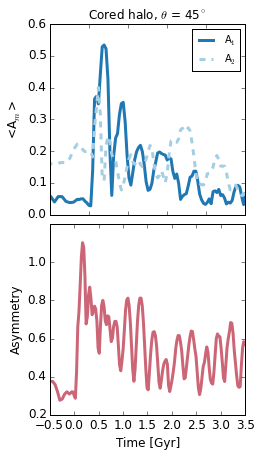

In [116]:
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

fig, axes = plt.subplots(2, figsize=(3.5, 7))
with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes, h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as contModes:
    with h5py.File('../Data/asymmetryDehnen.hdf5', 'r') as morphologies:
        IC_times = Modes['/stars/IC']['time'][()][-20:]
        IC_m1 = Modes['/stars/IC']['m1'][()][-20:]
        IC_m2 = Modes['/stars/IC']['m2'][()][-20:]

        group = Starsgroups[0]
        times = Modes[group]['main/time'][()]
        m1s = Modes[group]['main/m1'][()]
        m2s = Modes[group]['main/m2'][()]

        times_cont = contModes[group]['continue/time'][()]
        m1s_cont = contModes[group]['continue/m1'][()]
        m2s_cont = contModes[group]['continue/m2'][()]
        
        time = np.concatenate((IC_times-IC_times[-1], times, times_cont+2))
        m1 = np.concatenate((IC_m1, m1s, m1s_cont))
        m2 = np.concatenate((IC_m2, m2s, m2s_cont))    
    
        #time = np.append(IC_times-IC_times[-1], times, timescont+2)
        time -= encounter_time
        time *= co.UnitTime_in_Gyr
        #m1 = np.append(IC_m1, m1s, m1cont)
        #m2 = np.append(IC_m2, m2s, m2cont)

        axes[0].plot(time, m1, color='#1f78b4', label='A$_1$')
        axes[0].plot(time, m2, color='#a6cee3', label='A$_2$', linestyle='--')
        axes[0].set_xlim([-0.5, 2]) 
        axes[0].set_xticklabels([])
        axes[0].set_ylabel('<A$_m$>', fontsize=12)
        axes[0].legend(loc='upper right', fontsize=10)

        axis = axes[1]
        a_ICsim = morphologies['IC']['asymmetry'][-20:]
        a_sim = morphologies['main']['asymmetry'][:]
        a_contsim = morphologies['continue']['asymmetry'][:]
        a = np.concatenate((a_ICsim, a_sim, a_contsim))
        
        axis.plot(time, a, label='Asymmetry', color=colors[1], zorder=-1)
        axis.set_xlim([-0.5, 3.5]) 
        yticks = axis.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)

        axis.set_xlabel('Time [Gyr]', fontsize=12)
        axis.set_ylabel('Asymmetry', fontsize=12)

        axes[0].set_title(r'Cored halo, $\theta$ = 45$^{\circ}$')

plt.subplots_adjust(hspace = .05)
plt.savefig('../../Offsets_paper/plots/fourier_asymmetry.pdf', dpi=600, bbox_inches='tight')

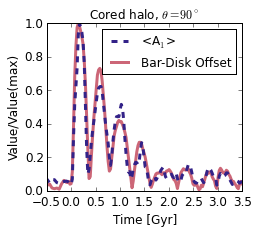

In [97]:
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
group = '/stars/90deg'
name =  r'$\theta = 90^{\circ}$'
fig, axis = plt.subplots(1, figsize=(3.5, 3))
with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes:
    with h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as ContModes:
        IC_times = Modes['/stars/IC']['time'][()][-20:]
        IC_m1 = Modes['/stars/IC']['m1'][()][-20:]

        times = Modes[group]['main/time'][()]
        m1s = Modes[group]['main/m1'][()]

        cont_times = ContModes[group]['continue/time'][()]
        cont_m1s = ContModes[group]['continue/m1'][()]
        
        time = np.concatenate((IC_times-IC_times[-1], times, cont_times + 2))
        time -= encounter_time
        time *= co.UnitTime_in_Gyr
        m1 = np.concatenate((IC_m1, m1s, cont_m1s))

        axis.plot(time, m1/max(m1), color=colors[0], label='<A$_1$>', linestyle='--')   

IC_disk_dist = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['disk_pos'][:, :, 0] -
                    DehnenOffsets_new['stars/IC']['dynamical_center'][:, 0:2])**2, axis=1))[-10:]

IC_bar_dist = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['bar_pos'][()] -
                    DehnenOffsets_new['stars/IC']['dynamical_center'][:, 0:2])**2, axis=1))[-10:]

IC_bar_offset = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['bar_pos'][()] -
                                DehnenOffsets_new['stars/IC']['disk_pos'][:, :, 0])**2, axis=1))[-10:]

IC_times = DehnenOffsets_new['stars/IC']['time'][-10:]
        

bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                  DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                 axis=1))

bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                             DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                            axis=1))
times = DehnenOffsets_new['%s/main'%group]['time'][()]
times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

time = np.concatenate((IC_times-IC_times[-1], times, times_cont + 2))
offset = np.concatenate((IC_bar_offset, bar_offset, bar_offset_cont))

#time = np.concatenate((times, times_cont+2))
#offset = np.concatenate((bar_offset, bar_offset_cont))

time -= encounter_time
time *= co.UnitTime_in_Gyr
axis.plot(time, offset/max(offset), color=colors[1], label='Bar-Disk Offset', zorder=-1)
axis.set_xlim([-0.5, 3.5]) 

axis.set_ylabel('Value/Value(max)', fontsize=12)
axis.set_xlabel('Time [Gyr]', fontsize=12)
axis.set_title(r'Cored halo, '+name)
    
axis.legend(loc='upper right')
plt.subplots_adjust(hspace = .05)
plt.savefig('../../Offsets_paper/plots/fourier_offset_compare_single.pdf', dpi=600, bbox_inches='tight')

## Fourier Modes and Offsets

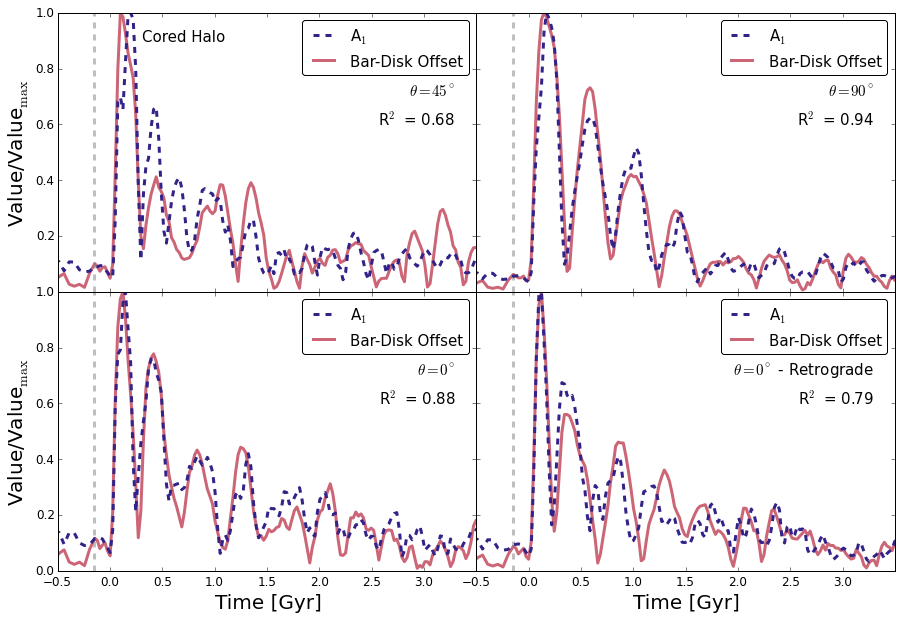

In [126]:
fig = plt.figure(figsize=(15, 10))

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes,\
     h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as ContModes:
    IC_times_modes = Modes['/stars/IC']['time'][()][-10:]
    IC_times_modes -= IC_times_modes[-1]
    IC_times_modes -=  encounter_time
    IC_m1 = Modes['/stars/IC']['m1'][()][-10:]

    for group, ax in zip(Starsgroups, grid):
        times = Modes["%s/main"%group]['time'][()] - encounter_time
        m1s = Modes["%s/main"%group]['m1'][()]
        times_cont = ContModes["%s/continue"%group]['time'][()] - encounter_time + 2
        m1s_cont = ContModes["%s/continue"%group]['m1'][()]

        time = np.concatenate((IC_times_modes, times, times_cont))
        m1 = np.concatenate((IC_m1, m1s, m1s_cont))
        time *= co.UnitTime_in_Gyr
        
        ax.plot(time, m1/max(m1), color=colors[0], label='A$_1$', linestyle='--')
        
        IC_bar_offset = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['bar_pos'][()] -
                                        DehnenOffsets_new['stars/IC']['disk_pos'][:, :, 0])**2, axis=1))[-10:]

        IC_times = DehnenOffsets_new['stars/IC']['time'][-10:]

        bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                          DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                         axis=1))

        bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                     DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                    axis=1))
        times = DehnenOffsets_new['%s/main'%group]['time'][()]
        times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

        time = np.concatenate((IC_times-IC_times[-1], times, times_cont + 2))
        offset = np.concatenate((IC_bar_offset, bar_offset, bar_offset_cont))

        time -= encounter_time
        time *= co.UnitTime_in_Gyr
        ax.plot(time, offset/max(offset), color=colors[1], label='Bar-Disk Offset', zorder=-1)
        off_scale = offset/max(offset)
        
        sstot = np.sum((off_scale-np.mean(off_scale))**2)
        ssres = np.sum((off_scale-m1/max(m1))**2)
      
        ax.annotate("R$^2$ = %3.2f" % (1 - ssres/sstot),
                    xy=(0.95, 0.6), color='black', xycoords='axes fraction', fontsize=15, ha='right')

    
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.2, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    ax.set_xlim(-0.5, 3.5)
    #ax.set_ylim(0, 0.6)
    ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel(r'Value/Value$_{\mathrm{max}}$', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i != 0:
        xticks = ax.xaxis.get_major_ticks()
        xticks[-1].label1.set_visible(False)
    
    ax.axvline(x=-encounter_time, linestyle='--', color='gray', zorder=-1, alpha=0.5)
    

#grid[0].annotate('Companion\nIntroduced', xy=(-encounter_time, 2.5), xycoords='data',
#                 fontsize=15, ha='left', color='gray', xytext=(10, 0), textcoords='offset points')        
plt.savefig('../../Offsets_paper/plots/fourier_offset_compare_multi.pdf', dpi=600, bbox_inches='tight')

Euc dist: 1.31628
R^2 = 0.684196
Euc dist: 0.739092
R^2 = 0.939253
Euc dist: 0.928721
R^2 = 0.877153
Euc dist: 1.04433
R^2 = 0.794557


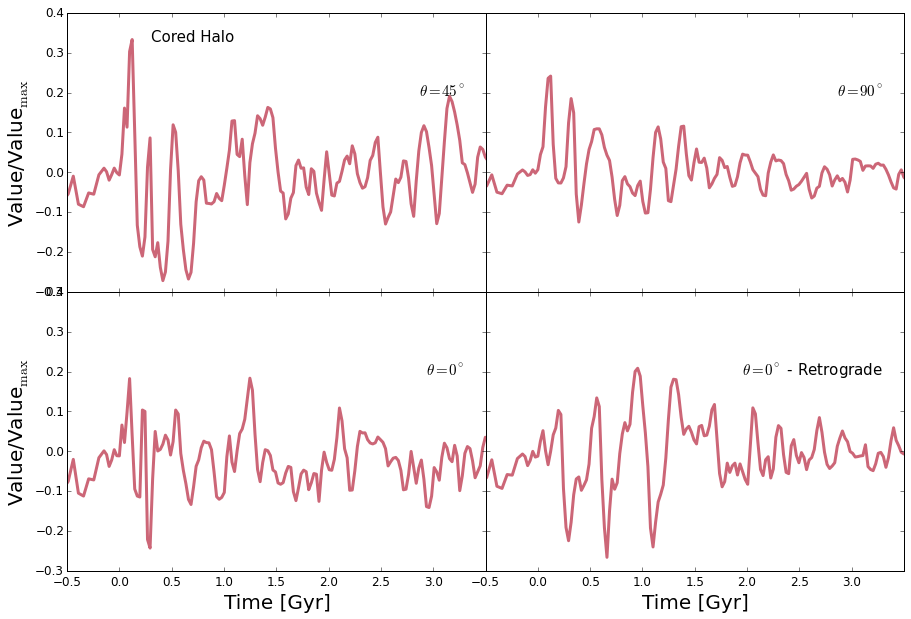

In [122]:
fig = plt.figure(figsize=(15, 10))

grid = Grid(fig, 111,
            nrows_ncols=(2, 2),
            axes_pad=0.0,
            label_mode="L",
            share_all=True
            )

Starsgroups = ['/stars/45deg',
               '/stars/90deg',
               '/stars/0deg',
               '/stars/0deg_retro']

with h5py.File('../Data/fouriermodesDehnen_disk.hdf5', 'r') as Modes,\
     h5py.File('../Data/fouriermodesDehnen_diskcontinue.hdf5', 'r') as ContModes:
    IC_times_modes = Modes['/stars/IC']['time'][()][-10:]
    IC_times_modes -= IC_times_modes[-1]
    IC_times_modes -=  encounter_time
    IC_m1 = Modes['/stars/IC']['m1'][()][-10:]

    for group, ax in zip(Starsgroups, grid):
        times = Modes["%s/main"%group]['time'][()] - encounter_time
        m1s = Modes["%s/main"%group]['m1'][()]
        times_cont = ContModes["%s/continue"%group]['time'][()] - encounter_time + 2
        m1s_cont = ContModes["%s/continue"%group]['m1'][()]

        time = np.concatenate((IC_times_modes, times, times_cont))
        m1 = np.concatenate((IC_m1, m1s, m1s_cont))
        time *= co.UnitTime_in_Gyr
        
        #ax.plot(time, m1/max(m1), color=colors[0], label='m=1', linestyle='--')
        
        IC_bar_offset = np.sqrt(np.sum((DehnenOffsets_new['stars/IC']['bar_pos'][()] -
                                        DehnenOffsets_new['stars/IC']['disk_pos'][:, :, 0])**2, axis=1))[-10:]

        IC_times = DehnenOffsets_new['stars/IC']['time'][-10:]

        bar_offset_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                                          DehnenOffsets_continue['%s/continue'%group]['bar_pos'][()])**2,
                                         axis=1))

        bar_offset = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                                     DehnenOffsets_new['%s/main'%group]['bar_pos'][()])**2,
                                    axis=1))
        times = DehnenOffsets_new['%s/main'%group]['time'][()]
        times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]

        time = np.concatenate((IC_times-IC_times[-1], times, times_cont + 2))
        offset = np.concatenate((IC_bar_offset, bar_offset, bar_offset_cont))

        time -= encounter_time
        time *= co.UnitTime_in_Gyr
        
        off_scale = offset/max(offset)
        
        sstot = np.sum((off_scale-np.mean(off_scale))**2)
        ssres = np.sum((off_scale-m1/max(m1))**2)
        
        print "Euc dist: %g" % np.sqrt(np.sum((off_scale-m1/max(m1))**2))
        print "R^2 = %g" % (1 - ssres/sstot)
        
        ax.plot(time, off_scale-m1/max(m1),
                color=colors[1])
            
        
for i, (ax, name) in enumerate(zip(grid, names)):
    if i == 0:
        ax.annotate("Cored Halo", xy=(0.2, 0.9),
                    color='black', xycoords='axes fraction', fontsize=15, ha='left')
        yticks = ax.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)
    ax.annotate(name, xy=(0.95, 0.7), color='black', xycoords='axes fraction', fontsize=15, ha='right')
    ax.set_xlim(-0.5, 3.5)
    #ax.set_ylim(0, 0.6)
    #ax.legend(fancybox=True, loc='upper right', fontsize=15)
    ax.set_ylabel(r'Value/Value$_{\mathrm{max}}$', fontsize=20)
    ax.set_xlabel("Time [Gyr]", fontsize=20)
    if i != 0:
        xticks = ax.xaxis.get_major_ticks()
        xticks[-1].label1.set_visible(False)
        
#plt.savefig('../../Offsets_paper/plots/fourier_offset_compare_multi.pdf', dpi=600, bbox_inches='tight')

## Rotation Curves

In [32]:
R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Dehnen_rotcurve.txt', unpack=True, skiprows=1)
print sqrt_vc2_tot.max(), sqrt_vc2_dm.max(), sqrt_vc2_disk.max()
R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Hern_rotcurve.txt', unpack=True, skiprows=1)
print sqrt_vc2_tot.max(), sqrt_vc2_dm.max(), sqrt_vc2_disk.max()

90.5719 85.5866 58.5366
99.3352 91.5735 60.9153


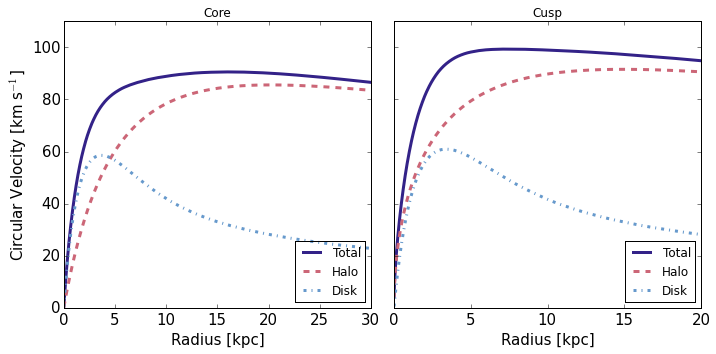

In [80]:
R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Dehnen_rotcurve.txt', unpack=True, skiprows=1)
colors = ['#332288', '#CC6677', '#6699CC', '#117733']

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
axes[0].plot(R, sqrt_vc2_tot, color=colors[0], label='Total')
axes[0].plot(R, sqrt_vc2_dm, color=colors[1], linestyle='--', label='Halo')
axes[0].plot(R, sqrt_vc2_disk, color=colors[2], linestyle='-.', label='Disk')
axes[0].set_xlim(0, 30)
axes[0].set_ylim(0, 110)
axes[0].legend(loc='lower right')
axes[0].set_xlabel('Radius [kpc]', fontsize=15)
axes[0].set_ylabel('Circular Velocity [km s$^{-1}$]', fontsize=15)
axes[0].set_title('Core')

R, sqrt_vc2_tot, sqrt_vc2_dm, sqrt_vc2_disk, sqrt_vc2_bulge = np.loadtxt('../Data/Hern_rotcurve.txt', unpack=True, skiprows=1)

axes[1].plot(R, sqrt_vc2_tot, color=colors[0], label='Total')
axes[1].plot(R, sqrt_vc2_dm, color=colors[1], linestyle='--', label='Halo')
axes[1].plot(R, sqrt_vc2_disk, color=colors[2], linestyle='-.', label='Disk')
axes[1].set_xlim(0, 20)
axes[1].set_ylim(0, 110)
axes[1].legend(loc='lower right')
axes[1].set_xlabel('Radius [kpc]', fontsize=15)
#axes[1].set_ylabel('Circular Velocity [km s$^{-1}$]', fontsize=15)
axes[1].set_title('Cusp')

plt.tight_layout()
plt.savefig('../../Offsets_paper/plots/Velcurves.pdf', dpi=300)

## Density Panels

In [15]:
def custom_plot(snap, axis, settings, plot_contours=True):
    bin_dict = snap.bin_snap(settings)
    Z2 = bin_dict['Z2']
    centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:]) / 2
    centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')
    
    xmax = 8
    ymax = 8
    
    im_func = settings['im_func']
    levels = np.linspace(settings['in_min'], settings['in_max'], 20)
    levels = np.append(levels, 2.8)

    im = axis.contourf(centerX, centerY, im_func(Z2),
                       colors = [(198/255.,219/255.,239/255., 1),
                                 (158/255.,202/255.,225/255., 1),
                                 cmap(0), cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8), cmap(1)],
                       vmin=settings['in_min'],
                      levels=levels[[0, 4, 8, 12, 16, -2, -1]])
    if settings['plotCompanionCOM']:
        companionCOM = bin_dict['companionCOM']
        if (np.abs(companionCOM[0]) < xmax
                and np.abs(companionCOM[1]) < ymax):
            axis.plot(companionCOM[0], companionCOM[1], marker='o', ms=10)
            com1, com2, gal1id, gal2id = snap.center_of_mass('stars')

            vx = snap.vel['stars'][gal2id, 0].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))
            vy = snap.vel['stars'][gal1id, 1].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))

            axis.arrow(companionCOM[0], companionCOM[1],
                       vx, vy,
                       head_width=0.25, head_length=0.5, fc='k', ec='k')

    if plot_contours:
        measurements = manipulate.fit_contours(Z2, settings, plot=True)
        eccs = measurements['eccs']
        majors = measurements['majors']
        minors = measurements['minors']
        axes_ratios = measurements['axes_ratios']
        xCenters = measurements['xCenters']
        yCenters = measurements['yCenters']
        ellipses = measurements['ellipses']
        angles = measurements['angles']

        bar_ind = np.max(np.where(eccs > 0.5)[0])
        for i, (e,
                major,
                minor,
                ecc,
                axis_ratio,
                xCenter,
                yCenter,
                angle) in enumerate(zip(ellipses,
                                        majors,
                                        minors,
                                        eccs,
                                        axes_ratios,
                                        xCenters,
                                        yCenters,
                                        angles)):
            #Changed the angle inside the measurement code
            #e = Ellipse([xCenter, yCenter],
            #             major,
            #             minor,
            #             angle=-angle,
            #             fill=False)
            if i == bar_ind:
                e.set_color('#ffffbf')
                #axis.plot(yCenter, xCenter, 'b.', ms=5)
                axis.add_artist(e)
            elif i == 0:
                e.set_color('black')
                #axis.plot(yCenter, xCenter, 'r+', ms=5, zorder=10)
                axis.add_artist(e)
            #elif i == 10:
                #print major, minor

            elif i in [4, 8, 12, 16, 20]:
                e.set_color('#fc8d59')
                axis.add_artist(e)
            #if (i==0) or ((major != majors[i-1]) and (minor != minors[i-1])):
            #    ell_art = axis.add_artist(e)
            
    if plot_contours:
        return im, measurements
    else:
        return im


## For paper

10.2163019191 9.22693075083
10.0940013083 9.63282251264
10.3124624402 7.72868864326
9.97998723905 7.6396501169


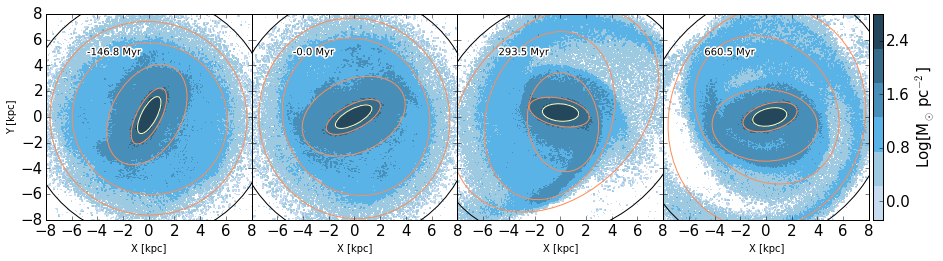

In [67]:
settings = utils.make_settings()
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 
#im_func = partial(ndimage.gaussian_filter, sigma=0.5)
def im_func(x):
    return x
settings['im_func'] = im_func
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/working/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_45deg/"
fig = plt.figure(1, figsize=(15.0, 5.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(1, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = [0, 6, 18, 33]#[0, 5, 10, 25]

for j, (i, axis) in enumerate(zip(panels, grid)):
    if j > 0:
        xticks = axis.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)
        
    axis.set_xlim([-8, 8])
    axis.set_ylim([-8, 8])

    snapname = folder + 'snap_' + str(i).zfill(3)

    snap = snapio.load_snap(snapname)
    snaphead = snap.header
    snaptime = snaphead['time'] - encounter_time

    time = snaptime * co.UnitTime_in_Gyr * 1000.0

    im, measurements = custom_plot(snap, axis, settings)
    #centDict, ellarts, im = snap.find_centers(settings,
    #                                          plot=True,
    #                                          axis=axis,
    #                                          return_im=True)
    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')
    axis.set_xlabel('X [kpc]', fontsize=10)
    axis.set_ylabel('Y [kpc]', fontsize=10)
    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
cbar = grid.cbar_axes[0].colorbar(im)
cbar.set_label_text('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=15)

outname = '../../Offsets_paper/plots/density_panels.pdf'
#plt.tight_layout()
#fig.savefig(outname, dpi=600)
#plt.close()

## All three groups (density, velocity, and stellar vel field)

In [ ]:
settings = utils.make_settings()
settings['xlen'] = 8
settings['ylen'] = 8
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 128
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 
#im_func = partial(ndimage.gaussian_filter, sigma=0.5)
def im_func(x):
    return x
settings['im_func'] = im_func
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_45deg/"
fig = plt.figure(1, figsize=(15.0, 10.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(3, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = [0, 6, 10, 20]#[0, 5, 10, 25]
#DENSITY
for j, snapnum in enumerate(panels):
    axis = grid[j]
    axis3 = grid[j+8]
    axis.set_xlabel('X [kpc]', fontsize=15)
    axis.xaxis.set_tick_params(labeltop='on')
    axis.xaxis.set_label_position('top') 
    if j > 0:
        xticks = axis.get_xticklabels()
        xticks[0].set_visible(False)

    snap = snapio.load_snap('{:s}snap_{:03d}.hdf5'.format(folder, snapnum))
    snaptime = 0
    snaphead = snap.header
    snaptime += snaphead['time']

    time = snaptime * co.UnitTime_in_Gyr * 1000.0

    im = custom_plot(snap, axis, settings)
    custom_plot(snap, axis3, settings, plot_contours=False)

    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')
    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
    axis.set_ylabel('Y [kpc]', fontsize=15)
    axis.set_xlim([-settings['xlen'], settings['xlen']])
    axis.set_ylim([-settings['ylen'], settings['ylen']])

    halo_pos = DehnenOffsets_best['/stars/45deg']['halo_pos'][snapnum, :]
    disk_pos = DehnenOffsets_best['/stars/45deg']['disk_pos'][snapnum, :]
    com1, com2, idgal1, idgal2 = snap.center_of_mass('stars')
    
    x = snap.pos['stars'][idgal1, 0]-com1[0]
    y = snap.pos['stars'][idgal1, 1]-com1[1]

    velx, xedges, yedges, binnumber = stats.binned_statistic_2d(x,
                                                                y,
                                                                snap.vel['stars'][idgal1, 0],
                                                                statistic='mean', bins=32,
                                                                range=[[-8, 8], [-8, 8]])

    vely, xedges, yedges, binnumber = stats.binned_statistic_2d(x,
                                                                y,
                                                                snap.vel['stars'][idgal1, 1],
                                                                statistic='mean', bins=32,
                                                                range=[[-8, 8], [-8, 8]])

    centerx = (xedges[:-1] + xedges[1:]) / 2
    centery = (yedges[:-1] + yedges[1:]) / 2
    Xbins, Ybins = np.meshgrid(centerx, centery)

    V = np.sqrt(velx.flatten()**2 + vely.flatten()**2)

    axis3.quiver(centerx, centery, vely, velx)
    axis3.plot(Xbins.flatten()[np.nanargmin(V)],
               Ybins.flatten()[np.nanargmin(V)], 'yo', ms=5, label='Velocity')
    axis3.plot(halo_pos[0], halo_pos[1], 'r.', ms=5, label='Halo')
    axis3.plot(disk_pos[0], disk_pos[1], 'gs', ms=5, label='Disk')
    axis3.plot(velcents2d[i, 0], velcents2d[i, 1], 'k^', label='HI')
    
    if j == 0:
        lgd = axis3.legend(ncol=2)
        lgd.get_frame().set_facecolor('White')

    time = snaptime * co.UnitTime_in_Gyr * 1000.0
    txt = axis.annotate("%4.1f Myr" % (time - encounter_time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')
    axis.set_ylabel('Y [kpc]', fontsize=15)
    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
    
plt.draw()
cbar_pos = grid.cbar_axes[0].get_position()
new_pos = [cbar_pos.x0, cbar_pos.y0+cbar_pos.height*2./3., cbar_pos.width, cbar_pos.height/3]
grid.cbar_axes[0].set_axis_off()
cbar_axis1 = fig.add_axes(new_pos)
cbar1 = fig.colorbar(im, cax=cbar_axis1)
cbar1.set_label('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=15)
cticks = cbar_axis1.get_yticklabels()
cticks[0].set_visible(False)

new_pos = [cbar_pos.x0, cbar_pos.y0, cbar_pos.width, cbar_pos.height/3]
cbar_axis3 = fig.add_axes(new_pos)
cbar3 = fig.colorbar(im, cax=cbar_axis3)
cbar3.set_label('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=15)
cticks = cbar_axis1.get_yticklabels()
cticks[-1].set_visible(False)

#VELOCITY

settings['colormap'] = 'gnuplot'
settings['scale'] = False
colors = ['#332288', '#88CCEE']

for j, (i, axis) in enumerate(zip(panels, grid[4:8])):
    if j==0:
        yticks = axis.get_yticklabels()
        yticks[-1].set_visible(False)   

    snapname = folder + 'snap_' + str(i).zfill(3)
    snap = snapio.load_snap(snapname)
    snaphead = snap.header
    snaptime = snaphead['time']
    Z2, x, y = snap.to_velfield(write=False, first_only=True, com=True)
    centerx = (x[:-1] + x[1:]) / 2
    centery = (y[:-1] + y[1:]) / 2
    centerY, centerX = np.meshgrid(centerx, centery)

    time = snaptime * co.UnitTime_in_Gyr * 1000.0

    binDict = {}
    binDict['Z2'] = Z2

    settings['in_min'] = -120
    settings['in_max'] = 120
    im = axis.contourf(centerX, centerY, Z2,
                       cmap=settings['colormap'], vmin=settings['in_min'],
                       vmax=settings['in_max'], levels = np.arange(-120, 140, 20))



    txt = axis.annotate("%4.1f Myr" % (time - encounter_time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')

    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])

    axis.set_ylabel('Y [kpc]', fontsize=15)
    axis.set_xlim([-settings['xlen'], settings['xlen']])
    axis.set_ylim([-settings['ylen'], settings['ylen']])

new_pos = [cbar_pos.x0, cbar_pos.y0+cbar_pos.height/3., cbar_pos.width, cbar_pos.height/3.]
cbar_axis2 = fig.add_axes(new_pos)
cbar2 = fig.colorbar(im, cax=cbar_axis2)
cbar2.set_label('km s$^{-1}$', fontsize=15)
cticks = cbar_axis2.get_yticklabels()
cticks[-1].set_visible(False)
cticks[0].set_visible(False)

for j, (i, axis) in enumerate(zip(panels, grid[8:])):
#if 0:
    if (j > 0):
        xticks = axis.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)
    if (j == 0):
        yticks = axis.yaxis.get_major_ticks()
        yticks[-1].label1.set_visible(False)

    axis.set_ylabel('Y [kpc]', fontsize=15)
    axis.set_xlabel('X [kpc]', fontsize=15)

outname = '../../Offsets_paper/plots/combined_panels.pdf'
#plt.tight_layout()
fig.savefig(outname, dpi=600, bbox_inches='tight')
#plt.close()

## Stellar Denisty and Velocity

/usr/users/spardy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:86: RuntimeWarning: invalid value encountered in divide


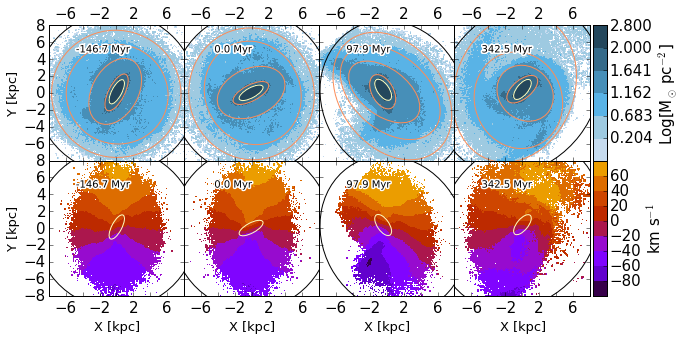

In [27]:
settings = utils.make_settings()
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 
#im_func = partial(ndimage.gaussian_filter, sigma=0.5)
def im_func(x):
    return x
settings['im_func'] = im_func
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/working/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_45deg/"
fig = plt.figure(1, figsize=(10.0, 10.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(2, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = [0, 6, 10, 20]#[0, 5, 10, 25]
for j, snapnum in enumerate(panels):
    #DENSITY
    axis = grid[j]  # Density panel
    axis.set_xlim([-8, 8])
    axis.set_ylim([-8, 8])
    axis.set_xlabel('X [kpc]', fontsize=15)
    axis.xaxis.set_tick_params(labeltop='on')
    axis.xaxis.set_label_position('top') 
#    if j > 0:
#        xticks = axis.get_xticklabels()
#        xticks[0].set_visible(False)
        
    snap = snapio.load_snap('{:s}snap_{:03d}.hdf5'.format(folder, snapnum))
    snaphead = snap.header
    snaptime = snaphead['time']- encounter_time

    time = snaptime * co.UnitTime_in_Gyr * 1000.0 + 0.2

    im, measurements = custom_plot(snap, axis, settings)

    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')
    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
    axis.set_ylabel('Y [kpc]', fontsize=15)
    axis.set_xlim([-settings['xlen'], settings['xlen']])
    axis.set_ylim([-settings['ylen'], settings['ylen']])

    txt = axis.annotate("%4.1f Myr" % (time - encounter_time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')
    axis.set_ylabel('Y [kpc]', fontsize=15)
    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
    
    #VELOCITIES
    axis2 = grid[j+4]  # Velocity panel

    
    Z2, (x, y, v) = snap.to_cube(parttype='gas', theta=45, write=False, first_only=True,
                      com=True, BINS=256, lengthX=10, lengthY=10)
    mom1 = np.zeros((256, 256))
    velocities = np.linspace(-200, 200, 100)
    for i in xrange(Z2.shape[2]):
        mom1 += Z2[:,:,i]*velocities[i]

    mom1 /= np.sum(Z2, axis=2)
    #Z2, x, y = snap.to_velfield(write=False, first_only=True, com=True)
    centerx = (x[:-1] + x[1:]) / 2
    centery = (y[:-1] + y[1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')

    velim = axis2.contourf(centerX, centerY, mom1,
                       cmap='gnuplot', vmin=-100,
                       vmax=100, levels = np.arange(-100, 100, 20))

    txt = axis2.annotate("%4.1f Myr" % (time - encounter_time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')

    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])


    eccs = measurements['eccs']
    majors = measurements['majors']
    minors = measurements['minors']
    axes_ratios = measurements['axes_ratios']
    xCenters = measurements['xCenters']
    yCenters = measurements['yCenters']
    angles = measurements['angles']

    bar_ind = np.max(np.where(eccs > 0.5)[0])
    #BAR
    e = Ellipse([xCenters[bar_ind], yCenters[bar_ind]],
                 majors[bar_ind],
                 minors[bar_ind],
                 angle=-angles[bar_ind],
                 fill=False)

    e.set_color('#ffffbf')
    axis2.add_artist(e)
    #DISK
    e = Ellipse([xCenters[0], yCenters[0]],
                 majors[0],
                 minors[0],
                 angle=-angles[0],
                 fill=False)
    e.set_color('black')
    axis2.add_artist(e)

for j, axis in enumerate(grid):
    axis.set_ylabel('Y [kpc]', fontsize=13)
    axis.set_xlabel('X [kpc]', fontsize=13)
    axis.set_xlim([-8, 8])
    axis.set_ylim([-8, 8])
    
    for label in axis.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
            
    
plt.draw()
cbar_pos = grid.cbar_axes[0].get_position()
new_pos = [cbar_pos.x0, cbar_pos.y0+cbar_pos.height/2., cbar_pos.width, cbar_pos.height/2]
grid.cbar_axes[0].set_axis_off()
cbar_axis1 = fig.add_axes(new_pos)
cbar1 = fig.colorbar(im, cax=cbar_axis1)
cbar1.set_label('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=15)
cticks = cbar_axis1.get_yticklabels()
cticks[0].set_visible(False)

#Setup some of the velocity axis stuff

#Velocity colorbar
new_pos = [cbar_pos.x0, cbar_pos.y0, cbar_pos.width, cbar_pos.height/2.]
cbar_axis2 = fig.add_axes(new_pos)
cbar2 = fig.colorbar(velim, cax=cbar_axis2)
cbar2.set_label('km s$^{-1}$', fontsize=15)
cticks = cbar_axis2.get_yticklabels()
cticks[-1].set_visible(False)
cticks[0].set_visible(False)

outname = '../../Offsets_paper/plots/combined_panels.pdf'
#plt.tight_layout()
yticks = grid[0].yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
fig.savefig(outname, dpi=600, bbox_inches='tight')
#plt.close()

## Lots of Panels

In [ ]:
settings = utils.make_settings()
settings['xlen'] = 8
settings['ylen'] = 8
settings['in_min'] = -0.2834#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = True
settings['NBINS'] = 128
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')

im_func = partial(ndimage.gaussian_filter, sigma=0.5)
settings['im_func'] = im_func
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_0deg/"
fig = plt.figure(1, figsize=(20.0, 20.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(4, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = range(0, 32, 2) 

for j, (i, axis) in enumerate(zip(panels, grid)):
    if (j > 0) and (j%4 > 0):
        xticks = axis.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)
    if (j > 0) and (j%4 == 0):
        yticks = axis.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)

    snapname = folder + 'snap_' + str(i).zfill(3)

    snap = snapio.load_snap(snapname)
    snaphead = snap.header
    snaptime = snaphead['time']

    time = snaptime * co.UnitTime_in_Gyr * 1000.0

    im = custom_plot(snap, axis, settings)
    #centDict, ellarts, im = snap.find_centers(settings,
    #                                          plot=True,
    #                                          axis=axis,
    #                                          return_im=True)
    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')

    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
cbar = grid.cbar_axes[0].colorbar(im)
cbar.set_label_text('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=10)

outname = '../Offsets_paper/plots/density_panels_large_0deg.pdf'
#plt.tight_layout()
fig.savefig(outname)
#plt.close()

## Gas Density

In [95]:
def gas_plot(snap, axis, settings):
    bin_dict = snap.bin_snap(settings)
    Z2 = bin_dict['Z2']
    centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:]) / 2
    centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery)
    
    measurements = manipulate.fit_contours(Z2, settings, plot=True)
    eccs = measurements['eccs']
    majors = measurements['majors']
    minors = measurements['minors']
    axes_ratios = measurements['axes_ratios']
    xCenters = measurements['xCenters']
    yCenters = measurements['yCenters']
    ellipses = measurements['ellipses']
    angles = measurements['angles']
    levels = np.linspace(settings['in_min'], settings['in_max'], 20)
    levels = np.append(levels, 2.0)

    im = axis.contourf(centerX, centerY, Z2, #cmap=settings['colormap'],
                       colors = [(198/255.,219/255.,239/255., 1),
                                 (158/255.,202/255.,225/255., 1),
                                 cmap(0), cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8), cmap(1)],
                       vmin=settings['in_min'],
                       #vmax=settings['in_max'],
                      levels=levels[[0, 4, 8, 12, 16, -2, -1]])#np.linspace(settings['in_min'], settings['in_max'], 6))
        
    #region, n = measure.label( (np.abs(np.diff(angles)/angles[:-1]) < 0.1)*(eccs[:-1] > 0.5))
    #bar_ind = np.where(region == n)[0][0]    
    bar_ind = np.max(np.where(eccs > 0.5)[0])
    for i, (e,
            major,
            minor,
            ecc,
            axis_ratio,
            xCenter,
            yCenter,
            angle) in enumerate(zip(ellipses,
                                    majors,
                                    minors,
                                    eccs,
                                    axes_ratios,
                                    xCenters,
                                    yCenters,
                                    angles)):
        if i == bar_ind:
            e.set_color('#ffffbf')
            axis.plot(yCenter, xCenter, 'b.', ms=5)
            axis.add_artist(e)
        elif i == 0:
            e.set_color('black')
            axis.plot(yCenter, xCenter, 'r+', ms=5, zorder=10)
            axis.add_artist(e)        
        elif i in [4, 8, 12, 16, 20]:
            e.set_color('#fc8d59')
            axis.add_artist(e)
        #if (i==0) or ((major != majors[i-1]) and (minor != minors[i-1])):
        #    ell_art = axis.add_artist(e)
            
    return im



In [ ]:
settings = utils.make_settings()
settings['xlen'] = 8
settings['ylen'] = 8
settings['in_min'] = -0.2834#+eps
settings['in_max'] = 1.5
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = True
settings['NBINS'] = 128
settings['parttype'] = 'gas'
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')

UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_45deg/"
fig = plt.figure(1, figsize=(20.0, 20.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(4, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = range(0, 16, 1) 

for j, (i, axis) in enumerate(zip(panels, grid)):
    if (j > 0) and (j%4 > 0):
        xticks = axis.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)
    if (j > 0) and (j%4 == 0):
        yticks = axis.yaxis.get_major_ticks()
        yticks[0].label1.set_visible(False)

    snapname = folder + 'snap_' + str(i).zfill(3)

    snap = snapio.load_snap(snapname)
    snaphead = snap.header
    snaptime = snaphead['time']

    time = snaptime * co.UnitTime_in_Gyr * 1000.0

    im = gas_plot(snap, axis, settings)
    #centDict, ellarts, im = snap.find_centers(settings,
    #                                          plot=True,
    #                                          axis=axis,
    #                                          return_im=True)
    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')

    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
cbar = grid.cbar_axes[0].colorbar(im)
cbar.set_label_text('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=10)

outname = '../Offsets_paper/plots/density_panels_large_gas.pdf'
#plt.tight_layout()
#fig.savefig(outname)
#plt.close()

## Halo Density

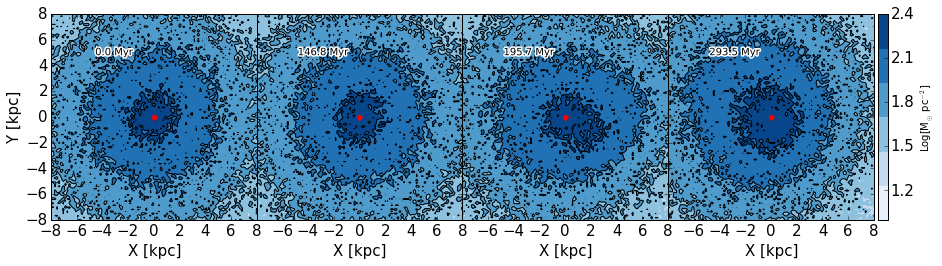

In [144]:
xlen = ylen = 8
bins = 100
settings = utils.make_settings(xlen=xlen, ylen=ylen, NBINS=bins)
settings['in_min'] = 0
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['colormap'] = 'Blues'
settings['parttype'] = 'halo'

colors = ['#332288', '#88CCEE']
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_45deg/"

ICfolder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "stars2gas/output_stars2gas/"

end = 40
begin = 0

fig = plt.figure(1, figsize=(15.0, 5.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                  nrows_ncols=(1, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = [0, 6, 8, 12]

for j, (i, axis) in enumerate(zip(panels, grid)):
    if j > 0:
        xticks = axis.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)


    if i < 0:
        snapname = ICfolder + 'snap_' + str(81+i).zfill(3)
        snaptime = -4
    else:
        snapname = folder + 'snap_' + str(i).zfill(3)
        snaptime = 0

    snap = snapio.load_snap(snapname)
    snaphead = snap.header
    snaptime += snaphead['time']
    com1, com2, gal1id, gal2id = snap.center_of_mass('stars')
    settings['offset'] = com1
    time = snaptime * co.UnitTime_in_Gyr * 1000.0
    bin_dict = snap.bin_snap(settings)
    X, Y = np.meshgrid(np.linspace(-xlen, xlen, bins), np.linspace(-ylen, ylen, bins))
    im = axis.contourf(X, Y, bin_dict['Z2'], cmap=settings['colormap'], levels=np.linspace(1, 2.4, 7))
    #im = plot_tools.plot_panel(axis, 'Z2', bin_dict, settings)
    axis.set_xlabel('X [kpc]', fontsize=15)
    axis.set_ylabel('Y [kpc]', fontsize=15)
    axis.plot([0], [0], 'r.', ms=10)
    CS = axis.contour(X, Y, bin_dict['Z2'], linewidths=1, colors='k', levels=np.linspace(1, 2.4, 7)[3:])
    #plt.clabel(CS, CS.levels, inline=True, fontsize=10)
    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')

    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
cbar = grid.cbar_axes[0].colorbar(im)
cbar.set_label_text('Log[M$_{\odot}$ pc$^{-2}$]', fontsize=10)

outname = '../Offsets_paper/plots/halo_density_panels.pdf'
#plt.tight_layout()
fig.savefig(outname)
#plt.close()

## Velocity Panels

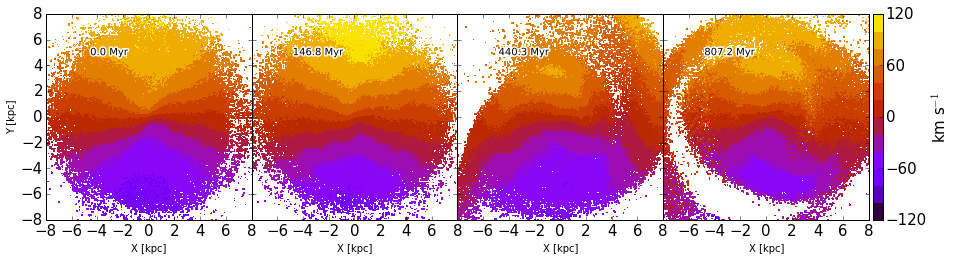

In [34]:
settings = utils.make_settings()
settings['xlen'] = 8
settings['ylen'] = 8
settings['in_min'] = 0
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['colormap'] = 'gnuplot'
settings['scale'] = False
colors = ['#332288', '#88CCEE']
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units

folder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "collisions_best/output_Dehnen_smc_45deg/"

ICfolder = "/usr/users/spardy/coors2/hpc_backup/working/Gas/Dehnen_LMC/" +\
         "stars2gas/output_stars2gas/"

end = 40
begin = 0

fig = plt.figure(1, figsize=(15.0, 5.0))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),
                 axes_pad=0.0,
                 share_all=True,
                 label_mode='L',
                 cbar_pad=0.05,
                 cbar_mode='single',
                 cbar_location='right')

panels = [0, 6, 18, 33]

for j, (i, axis) in enumerate(zip(panels, grid)):
    if j > 0:
        xticks = axis.xaxis.get_major_ticks()
        xticks[0].label1.set_visible(False)

    if i < 0:
        snapname = ICfolder + 'snap_' + str(81+i).zfill(3)
        snaptime = -4
    else:
        snapname = folder + 'snap_' + str(i).zfill(3)
        snaptime = 0


    snap = snapio.load_snap(snapname)
    snaphead = snap.header
    snaptime += snaphead['time']
    Z2, x, y = snap.to_velfield(write=False, first_only=True, com=True)
    centerx = (x[:-1] + x[1:]) / 2
    centery = (y[:-1] + y[1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery)

    time = snaptime * co.UnitTime_in_Gyr * 1000.0

    binDict = {}
    binDict['Z2'] = Z2

    settings['in_min'] = -120
    settings['in_max'] = 120
    im = axis.contourf(centerX, centerY, Z2,
                       cmap=settings['colormap'], vmin=settings['in_min'],
                       vmax=settings['in_max'], levels = np.arange(-120, 140, 20))
    axis.set_xlim([-settings['xlen'], settings['xlen']])
    axis.set_ylim([-settings['ylen'], settings['ylen']])
    #im = plot_tools.plot_panel(axis, 'Z2', binDict, settings)
    axis.set_xlabel('X [kpc]', fontsize=10)
    axis.set_ylabel('Y [kpc]', fontsize=10)

    txt = axis.annotate("%4.1f Myr" % (time),
                        fontsize=10,
                        xy=(.2, .8), xycoords='axes fraction',
                        textcoords='axes fraction',
                        xytext=(.2, .8), color='black')

    txt.set_path_effects([PathEffects.withStroke(linewidth=3,
                                                 foreground="w")])
cbar = grid.cbar_axes[0].colorbar(im)
cbar.set_label_text('km s$^{-1}$', fontsize=15)

outname = '../../Offsets_paper/plots/velocity_panels.pdf'
#plt.tight_layout()
fig.savefig(outname, dpi=600)
#plt.close()